<a href="https://colab.research.google.com/github/weipengdeng/topic_modelling/blob/main/Journal_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 模块

In [ ]:
#连接google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Input/Sam/Files

/content/drive/.shortcut-targets-by-id/15_rkhW54ASTe3gP5JjEdj3H3DBmq1XFv/Input/Sam/Files


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# 1 percentage

In [ ]:
infile = 'Master_Analysis.csv'
df = pd.read_csv(infile, index_col = 0)

In [ ]:
df['Interval'].unique()

array(['1991-2000', '2001-2005', '2006-2010', '2011-2015', '2016-2018',
       '2019-2021'], dtype=object)

In [ ]:
df.head()

,Document,Dominant Topic,Labels,Topic_Concat,Topic,Contribution %,Topic Desc,Title,Author,Author_Count,...,CitedReference,Year,Interval,ResearchArea,Journal,CitedCount,AuthorAffiliation,CorrespondingAuthorAffiliation,Abstract_Title_Keywords,Page_Number
44030,44030,6,spatial effect,T6-spatial effect,T6-Spatial effect,11.64,"effect, spatial, level, impact, factor, differ...",SUBCENTERS IN THE LOS-ANGELES REGION,"GIULIANO, G;SMALL, KA",2,...,34,1991,1991-2000,BUSINESS & ECONOMICS; ENVIRONMENTAL SCIENCES &...,REGIONAL SCIENCE AND URBAN ECONOMICS,461,UNIV CALIF IRVINE,UNIV SO CALIF,SUBCENTERS IN THE LOS-ANGELES REGION,7.0
44145,44145,6,spatial effect,T6-spatial effect,T6-Spatial effect,10.36,"effect, spatial, level, impact, factor, differ...",THE SPATIAL MISMATCH HYPOTHESIS - WHAT HAS THE...,"HOLZER, HJ",1,...,37,1991,1991-2000,ENVIRONMENTAL SCIENCES & ECOLOGY; URBAN STUDIES,URBAN STUDIES,354,MICHIGAN STATE UNIV,MICHIGAN STATE UNIV,THE SPATIAL MISMATCH HYPOTHESIS - WHAT HAS T...,22.0
43933,43933,5,Transportation,T5-Transportation,T5-Transportation,9.26,"model, service, location, time, cost, infrastr...",ASYMMETRIC TAX COMPETITION,"BUCOVETSKY, S",1,...,8,1991,1991-2000,BUSINESS & ECONOMICS; URBAN STUDIES,JOURNAL OF URBAN ECONOMICS,319,YORK UNIV,YORK UNIV,ASYMMETRIC TAX COMPETITION,19.0
43843,43843,2,regional economics,T2-regional economics,T2-Regional economics,17.43,"regional, region, economic, network, knowledge...",TAX COMPETITION WITH INTERREGIONAL DIFFERENCES...,"WILSON, JD",1,...,18,1991,1991-2000,BUSINESS & ECONOMICS; ENVIRONMENTAL SCIENCES &...,REGIONAL SCIENCE AND URBAN ECONOMICS,245,INDIANA UNIV,INDIANA UNIV,THIS PAPER STUDIES 'TAX COMPETITION' BETWEEN T...,8.0
43901,43901,3,socio-political geography,T3-socio-political geography,T3-Socio-political geography,9.75,"political, social, state, theory, practice, co...",THE COMMUTING PARADOX - EVIDENCE FROM THE TOP 20,"GORDON, P;RICHARDSON, HW;JUN, MJ",3,...,10,1991,1991-2000,PUBLIC ADMINISTRATION; URBAN STUDIES,JOURNAL OF THE AMERICAN PLANNING ASSOCIATION,242,UNIV SO CALIF,UNIV SO CALIF,THE COMMUTING PARADOX - EVIDENCE FROM THE TO...,19.0


In [ ]:
def format_journal_name(name):
    # Replace '-' with ':'
    name = name.replace('-', ':')

    # Split the name by ':' and handle capitalization
    parts = name.split(':')
    formatted_parts = []

    for part in parts:
        words = part.split()
        formatted_words = [
            word.capitalize() if word.lower() not in ['and', 'of', 'in', 'the'] else word.lower()
            for word in words
        ]
        # Ensure the first word is always capitalized
        formatted_words[0] = formatted_words[0].capitalize()
        formatted_parts.append(' '.join(formatted_words))

    # Join the parts back together with ':'
    return ':'.join(formatted_parts)

# Example usage
name = "journal-name of the world"
formatted_name = format_journal_name(name)
print(formatted_name)  # Output: "Journal: Name of the World"


Journal:Name of the World


In [ ]:
df['fm_journal'] = df['Journal'].apply(format_journal_name)

In [ ]:
# Count the number of articles per journal per year
df_summary = df.groupby(['Year', 'fm_journal']).size().reset_index(name='count')

# Calculate the total number of articles per year
df_total = df_summary.groupby('Year')['count'].sum().reset_index()
df_total = df_total.rename(columns={'count': 'total_count'})

# Merge the total count with the summary
df_summary = df_summary.merge(df_total, on='Year')

# Calculate the percentage of articles from each journal per year
df_summary['percentage'] = (df_summary['count'] / df_summary['total_count']) * 100


/tmp/ipython-input-889397581.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('tab20')


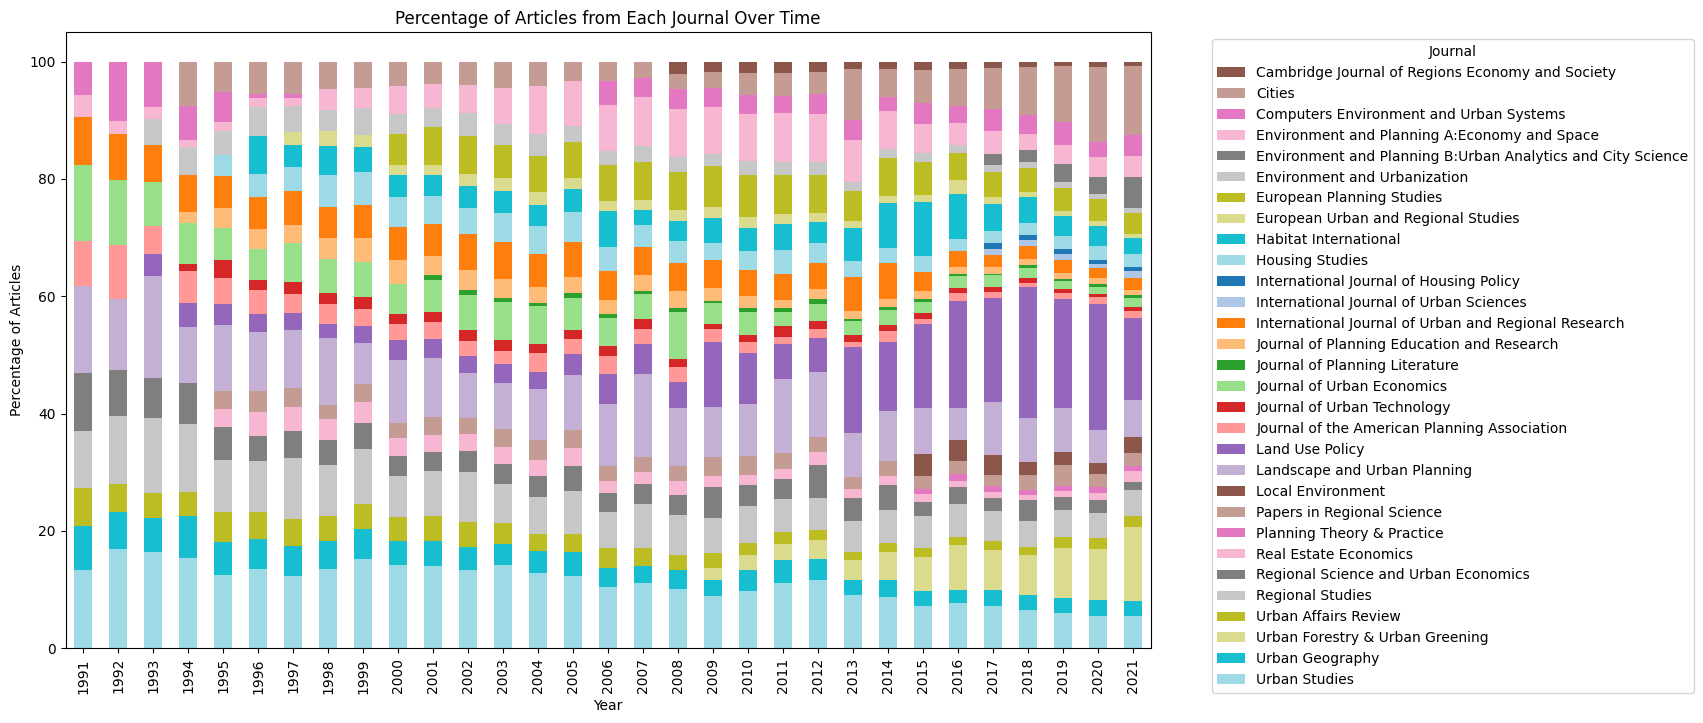

In [ ]:
# Pivot the DataFrame for bar chart
bar_chart_data = df_summary.pivot_table(values='percentage', index='Year', columns='fm_journal', fill_value=0)

# Reverse the order of the columns to reverse the segment order in the bar chart
bar_chart_data = bar_chart_data[bar_chart_data.columns[::-1]]

# Define the color map and reverse it
colormap = plt.cm.get_cmap('tab20')
colors = [colormap(i) for i in range(colormap.N)]
colors = colors[::-1]

# Plot bar chart
ax = bar_chart_data.plot(kind='bar', stacked=True, figsize=(14, 8), color=colors)
plt.title('Percentage of Articles from Each Journal Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Articles')

# Reverse the order of the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Journal', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


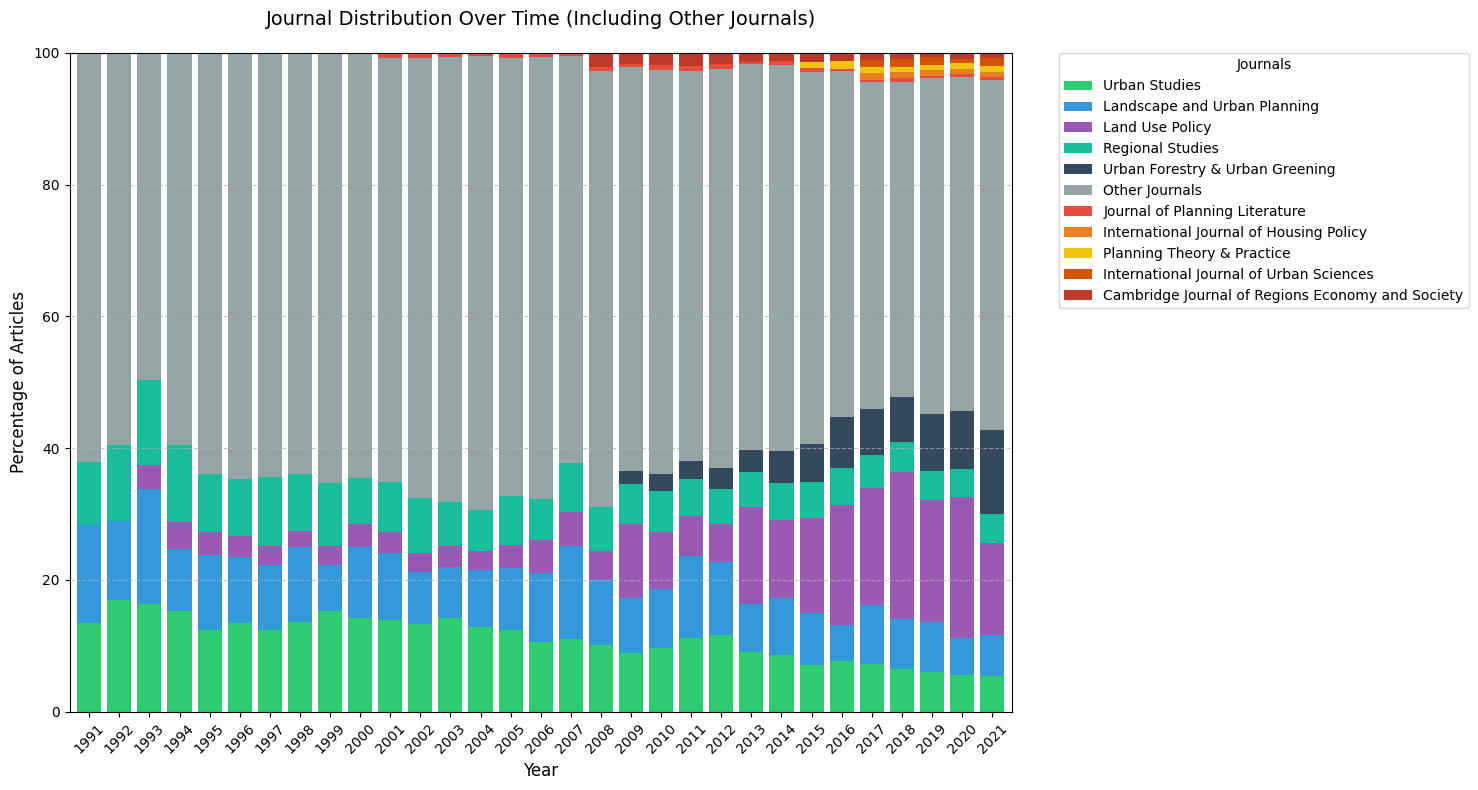

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculate the mean percentage for each journal across all years
journal_means = df_summary.groupby('fm_journal')['percentage'].mean()

# Get top 5 and bottom 5 journals
top_journals = journal_means.nlargest(5).index
bottom_journals = journal_means.nsmallest(5).index

# Create a copy of the original DataFrame
df_modified = df_summary.copy()

# Create 'Journal Category' column
def categorize_journal(row):
    if row['fm_journal'] in top_journals:
        return row['fm_journal']
    elif row['fm_journal'] in bottom_journals:
        return row['fm_journal']
    else:
        return 'Other Journals'

df_modified['journal_category'] = df_modified.apply(categorize_journal, axis=1)

# Group by Year and journal_category, summing the percentages
df_grouped = df_modified.groupby(['Year', 'journal_category'])['percentage'].sum().reset_index()

# Pivot the data for plotting
bar_chart_data = df_grouped.pivot(
    index='Year',
    columns='journal_category',
    values='percentage'
)

# Ensure the columns are in the desired order (top 5, other, bottom 5)
column_order = list(top_journals) + ['Other Journals'] + list(bottom_journals)
bar_chart_data = bar_chart_data[column_order]

# Create a custom color palette
# Using a combination of distinct colors for better visibility
colors = [
    # Vibrant colors for top 5
    '#2ecc71',  # emerald green
    '#3498db',  # bright blue
    '#9b59b6',  # amethyst purple
    '#1abc9c',  # turquoise
    '#34495e',  # dark blue grey

    # Neutral color for Other Journals
    '#95a5a6',  # grey

    # Warm colors for bottom 5
    '#e74c3c',  # red
    '#e67e22',  # orange
    '#f1c40f',  # yellow
    '#d35400',  # dark orange
    '#c0392b',  # dark red
]

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(15, 8))
bar_chart_data.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=colors,
    width=0.8
)

# Customize the plot
plt.title('Journal Distribution Over Time (Including Other Journals)', pad=20, size=14)
plt.xlabel('Year', size=12)
plt.ylabel('Percentage of Articles', size=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend with custom formatting
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles,
    labels,
    title='Journals',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.,
    frameon=True
)

# Add percentage labels on the bars
#for c in ax.containers:
    # Add labels only for segments > 3%
    #ax.bar_label(c, fmt='%.1f%%', label_type='center')

# Adjust layout to prevent legend cutoff
plt.tight_layout()

# Add grid lines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ensure y-axis goes from 0 to 100
ax.set_ylim(0, 100)

plt.show()

In [ ]:
!wget -O simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"

--2024-08-08 06:14:39--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.21.1.127, 172.67.129.58, 2606:4700:3031::ac43:813a, ...
Connecting to www.wfonts.com (www.wfonts.com)|104.21.1.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘simhei.ttf’

simhei.ttf          100%[===================>]   9.58M  4.90MB/s    in 2.0s    

2024-08-08 06:14:42 (4.90 MB/s) - ‘simhei.ttf’ saved [10050870/10050870]



In [ ]:
!wget TimesNewRoman.ttf "https://github.com/sonatype/maven-guide-en/blob/master/mvnbook-content/src/fonts/TimesNewRoman.ttf"

In [ ]:
import matplotlib.font_manager as fm

# Get the list of available font families
available_fonts = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_names = sorted(set(fm.FontProperties(fname=fname).get_name() for fname in available_fonts))

# Print the list of available font families
for font in font_names:
    print(font)

Humor Sans
Liberation Mono
Liberation Sans
Liberation Sans Narrow
Liberation Serif


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from google.colab import files

In [ ]:
# Step 1: Upload the font file
uploaded = files.upload()  # Upload 'GillSansMT.ttf'

# Step 2: Add the font to Matplotlib
font_path = list(uploaded.keys())[0]  # Get the uploaded font file name
fontprop = fm.FontProperties(fname=font_path)

# Step 3: Set the font globally
plt.rcParams['font.family'] = fontprop.get_name()

Saving Gill Sans.otf to Gill Sans.otf


In [ ]:
import matplotlib.pyplot as plt

# Set the font globally to 'Gill Sans MT'
plt.rcParams['font.family'] = 'Gill Sans'

# Pivot the DataFrame for bar chart
bar_chart_data = df_summary.pivot_table(values='percentage', index='Year', columns='fm_journal', fill_value=0)
# Reverse the order of the columns to reverse the segment order in the bar chart
bar_chart_data = bar_chart_data[bar_chart_data.columns[::-1]]

# Define a custom color palette with 30 distinct colors
colors_tab20 = plt.cm.tab20.colors
colors_tab20b = plt.cm.tab20b.colors
colors_tab20c = plt.cm.tab20c.colors

# Combine the colors and select the first 30
colors = colors_tab20 + colors_tab20b + colors_tab20c
colors = colors[:30]

# Plot bar chart
ax = bar_chart_data.plot(kind='bar', stacked=True, figsize=(14, 8), color=colors)

# Customize labels and legend
#plt.title('Percentage of Articles from Each Journal Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Articles')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.02, 1), loc='upper left', labelspacing=0.5)

# Save the figure to a PDF file with high resolution (300 ppi)
plt.savefig('/content/drive/MyDrive/Project/2024_Sam/bar_chart_high_res.pdf', format='pdf', dpi=600, bbox_inches='tight',font_name = '')

plt.show()


In [ ]:
# Step 4: Your original code with the font now applied
# Pivot the DataFrame for bar chart
bar_chart_data = df_summary.pivot_table(values='percentage', index='Year', columns='fm_journal', fill_value=0)
# Reverse the order of the columns to reverse the segment order in the bar chart
bar_chart_data = bar_chart_data[bar_chart_data.columns[::-1]]

# Define a custom color palette with 30 distinct colors
colors_tab20 = plt.cm.tab20.colors
colors_tab20b = plt.cm.tab20b.colors
colors_tab20c = plt.cm.tab20c.colors

# Combine the colors and select the first 30
colors = colors_tab20 + colors_tab20b + colors_tab20c
colors = colors[:30]

# Plot bar chart
ax = bar_chart_data.plot(kind='bar', stacked=True, figsize=(14, 8), color=colors)

# Customize labels and legend
#plt.title('Percentage of Articles from Each Journal Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Articles')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.02, 1), loc='upper left', labelspacing=0.5)

# Save the figure to a PDF file with high resolution (300 ppi)
plt.savefig('/content/drive/MyDrive/Project/2024_Sam/bar_chart_high_res.pdf', format='pdf', dpi=600, bbox_inches='tight')

plt.show()

In [ ]:
# Check available fonts
import matplotlib.font_manager as fm

# List all available fonts
available_fonts = [f.name for f in fm.fontManager.ttflist]
print("Available fonts:")
for font in sorted(available_fonts):
    print(f"- {font}")

In [ ]:
#matplotlib.font_manager.fontManager.addfont('Arial')
matplotlib.rc('font', family='Liberation Serif')

In [ ]:
# Set the font settings before creating the plot
plt.rcParams['font.family'] = 'Liberation Sans'
plt.rcParams['font.size'] = 12          # Base font size
plt.rcParams['axes.labelsize'] = 12     # Size for axis labels
plt.rcParams['xtick.labelsize'] = 10    # Size for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 10    # Size for y-axis tick labels
plt.rcParams['legend.fontsize'] = 10    # Size for legend text

# To verify the font is applied
print(f"Current font family: {plt.rcParams['font.family']}")

Current font family: ['Liberation Sans']


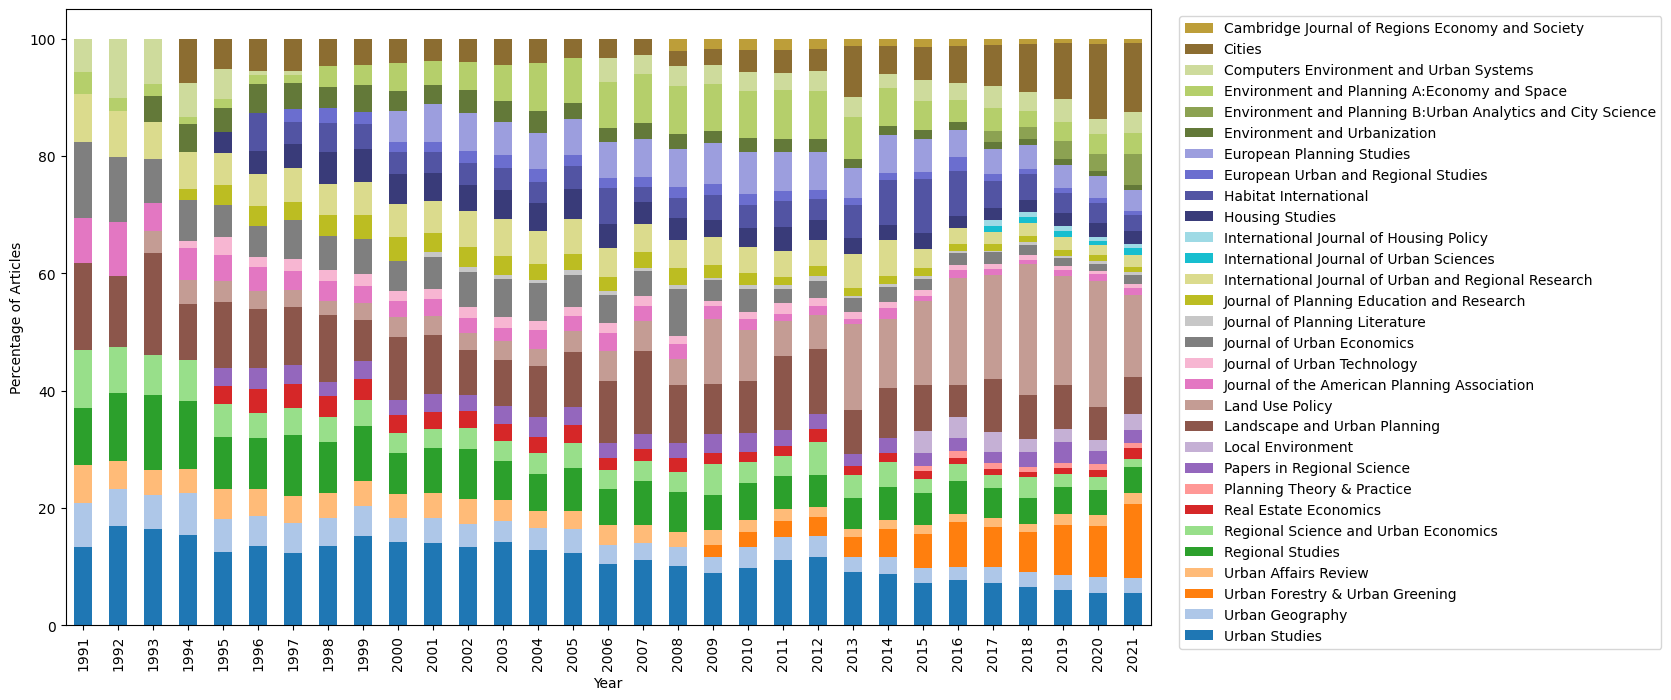

In [ ]:
# Pivot the DataFrame for bar chart
bar_chart_data = df_summary.pivot_table(values='percentage', index='Year', columns='fm_journal', fill_value=0)
# Reverse the order of the columns to reverse the segment order in the bar chart
bar_chart_data = bar_chart_data[bar_chart_data.columns[::-1]]


# Define a custom color palette with 30 distinct colors
colors_tab20 = plt.cm.tab20.colors
colors_tab20b = plt.cm.tab20b.colors
colors_tab20c = plt.cm.tab20c.colors

# Combine the colors and select the first 30
colors = colors_tab20 + colors_tab20b + colors_tab20c
colors = colors[:30]

# Plot bar chart
ax = bar_chart_data.plot(kind='bar', stacked=True, figsize=(14, 8), color = colors)
#plt.title('Percentage of Articles from Each Journal Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Articles')


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.02, 1), loc='upper left', labelspacing=0.5)

# Save the figure to a PDF file with high resolution (300 ppi)
plt.savefig('/content/drive/MyDrive/Project/2024_Sam/bar_chart_high_res.pdf', format='pdf', dpi=600,bbox_inches='tight')

plt.show()

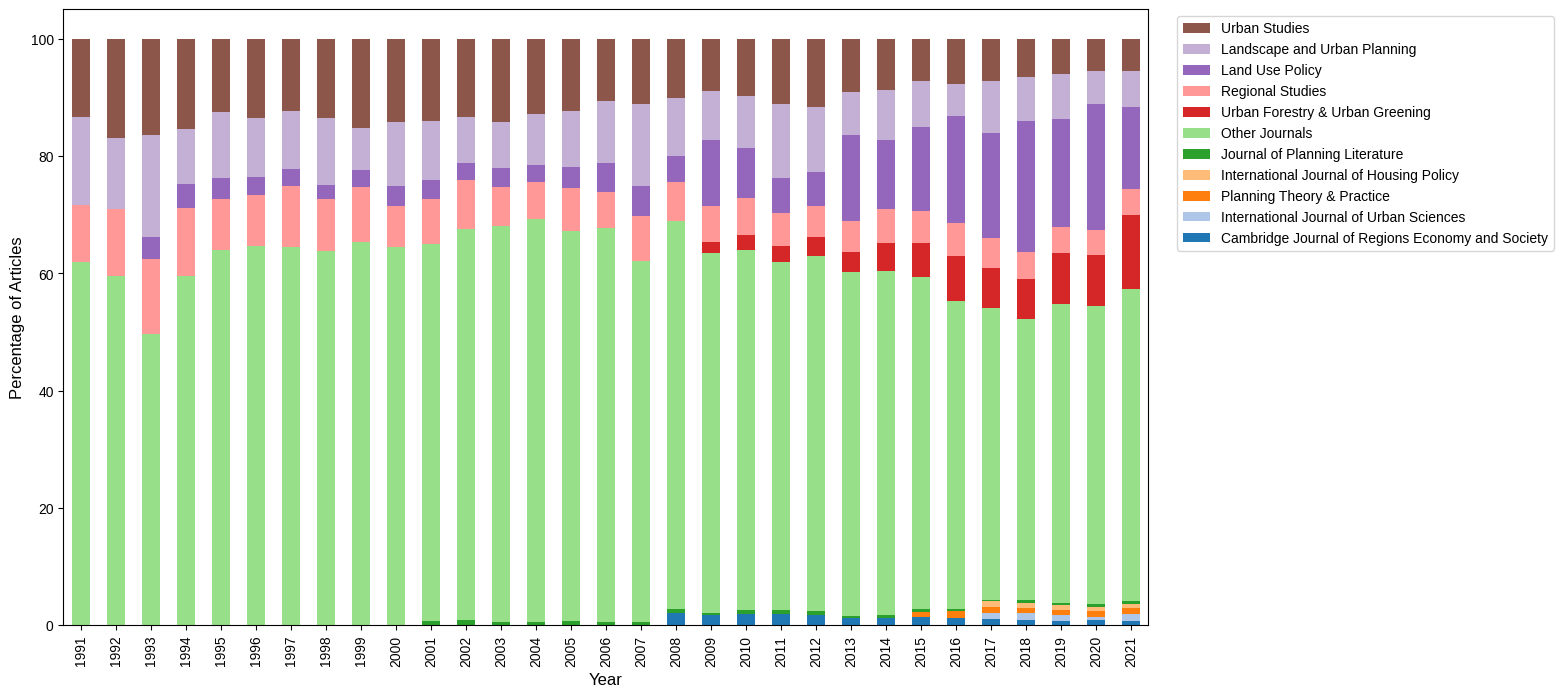

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculate the mean percentage for each journal across all years
journal_means = df_summary.groupby('fm_journal')['percentage'].mean()

# Get top 5 and bottom 5 journals
top_journals = journal_means.nlargest(5).index
bottom_journals = journal_means.nsmallest(5).index

# Create a copy of the original DataFrame
df_modified = df_summary.copy()

# Create 'Journal Category' column
def categorize_journal(row):
    if row['fm_journal'] in top_journals:
        return row['fm_journal']
    elif row['fm_journal'] in bottom_journals:
        return row['fm_journal']
    else:
        return 'Other Journals'

df_modified['journal_category'] = df_modified.apply(categorize_journal, axis=1)

# Group by Year and journal_category, summing the percentages
df_grouped = df_modified.groupby(['Year', 'journal_category'])['percentage'].sum().reset_index()

# Pivot the data for plotting
bar_chart_data = df_grouped.pivot(
    index='Year',
    columns='journal_category',
    values='percentage'
)

# Ensure the columns are in the desired order (top 5, other, bottom 5)
column_order = list(top_journals) + ['Other Journals'] + list(bottom_journals)
bar_chart_data = bar_chart_data[column_order]

# Reverse the order of the columns to match the original code
bar_chart_data = bar_chart_data[bar_chart_data.columns[::-1]]

# Define color palette using the same approach as the original code
colors_tab20 = plt.cm.tab20.colors
colors_tab20b = plt.cm.tab20b.colors
colors_tab20c = plt.cm.tab20c.colors

# Combine the colors and select enough for all categories
colors = colors_tab20 + colors_tab20b + colors_tab20c
colors = colors[:len(bar_chart_data.columns)]

# Plot bar chart
ax = bar_chart_data.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    color=colors
)

plt.xlabel('Year')
plt.ylabel('Percentage of Articles')

# Add legend with the same formatting as the original
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles[::-1],
    labels[::-1],
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    labelspacing=0.5
)

# Save the figure with high resolution
plt.savefig('bar_chart_high_res.pdf',
            format='pdf',
            dpi=600,
            bbox_inches='tight')

plt.show()

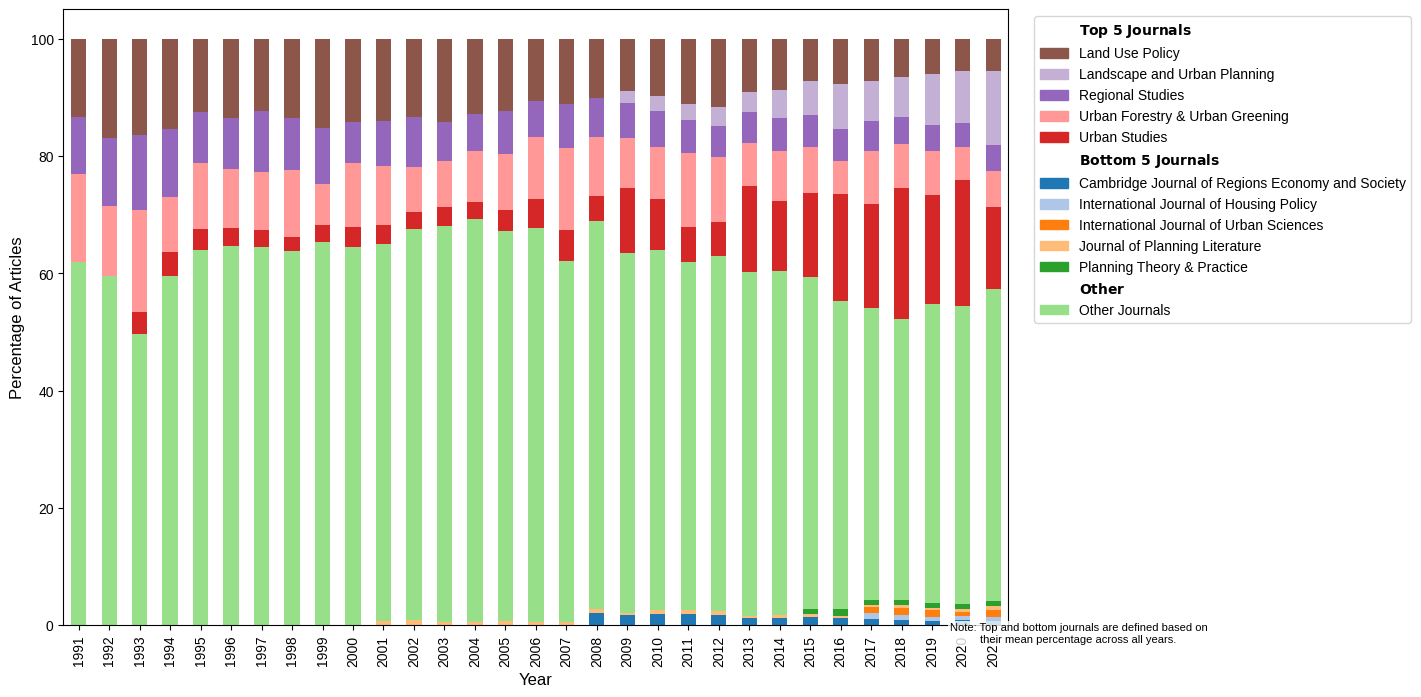

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Calculate the mean percentage for each journal across all years
journal_means = df_summary.groupby('fm_journal')['percentage'].mean()

# Get top 5 and bottom 5 journals
top_journals = journal_means.nlargest(5).index
bottom_journals = journal_means.nsmallest(5).index

# Create a copy of the original DataFrame
df_modified = df_summary.copy()

# Create 'Journal Category' column
def categorize_journal(row):
    if row['fm_journal'] in top_journals:
        return f"Top: {row['fm_journal']}"  # Add prefix for top journals
    elif row['fm_journal'] in bottom_journals:
        return f"Bottom: {row['fm_journal']}"  # Add prefix for bottom journals
    else:
        return 'Other Journals'

df_modified['journal_category'] = df_modified.apply(categorize_journal, axis=1)

# Group by Year and journal_category, summing the percentages
df_grouped = df_modified.groupby(['Year', 'journal_category'])['percentage'].sum().reset_index()

# Pivot the data for plotting
bar_chart_data = df_grouped.pivot(
    index='Year',
    columns='journal_category',
    values='percentage'
)

# Organize columns: first bottom journals, then other, then top journals
top_cols = [col for col in bar_chart_data.columns if col.startswith('Top')]
bottom_cols = [col for col in bar_chart_data.columns if col.startswith('Bottom')]
other_cols = [col for col in bar_chart_data.columns if col == 'Other Journals']

# Combine in desired order
column_order = bottom_cols + other_cols + top_cols
bar_chart_data = bar_chart_data[column_order]

# Define color palette
colors_tab20 = plt.cm.tab20.colors
colors_tab20b = plt.cm.tab20b.colors
colors_tab20c = plt.cm.tab20c.colors
colors = colors_tab20 + colors_tab20b + colors_tab20c
colors = colors[:len(bar_chart_data.columns)]

# Plot bar chart
fig, ax = plt.subplots(figsize=(14, 8))
bar_chart_data.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=colors
)

plt.xlabel('Year')
plt.ylabel('Percentage of Articles')

# Create custom legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Create legend with sections
legend_elements = []

# Add Top 5 Journals section
legend_elements.append(Patch(color='none', label=r'$\bf{Top\ 5\ Journals}$', alpha=0))
for i, col in enumerate(top_cols):
    legend_elements.append(Patch(color=colors[-(i+1)], label=col.replace('Top: ', '')))

# Add Bottom 5 Journals section
legend_elements.append(Patch(color='none', label=r'$\bf{Bottom\ 5\ Journals}$', alpha=0))
for i, col in enumerate(bottom_cols):
    legend_elements.append(Patch(color=colors[i], label=col.replace('Bottom: ', '')))

# Add Other Journals section
legend_elements.append(Patch(color='none', label=r'$\bf{Other}$', alpha=0))
legend_elements.append(Patch(color=colors[len(bottom_cols)], label='Other Journals'))

# Add the custom legend
ax.legend(
    handles=legend_elements,
    labels=[le.get_label() for le in legend_elements],
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    labelspacing=0.5
)





# Save the figure with high resolution
plt.savefig('bar_chart_high_res.pdf',
            format='pdf',
            dpi=600,
            bbox_inches='tight')

plt.show()

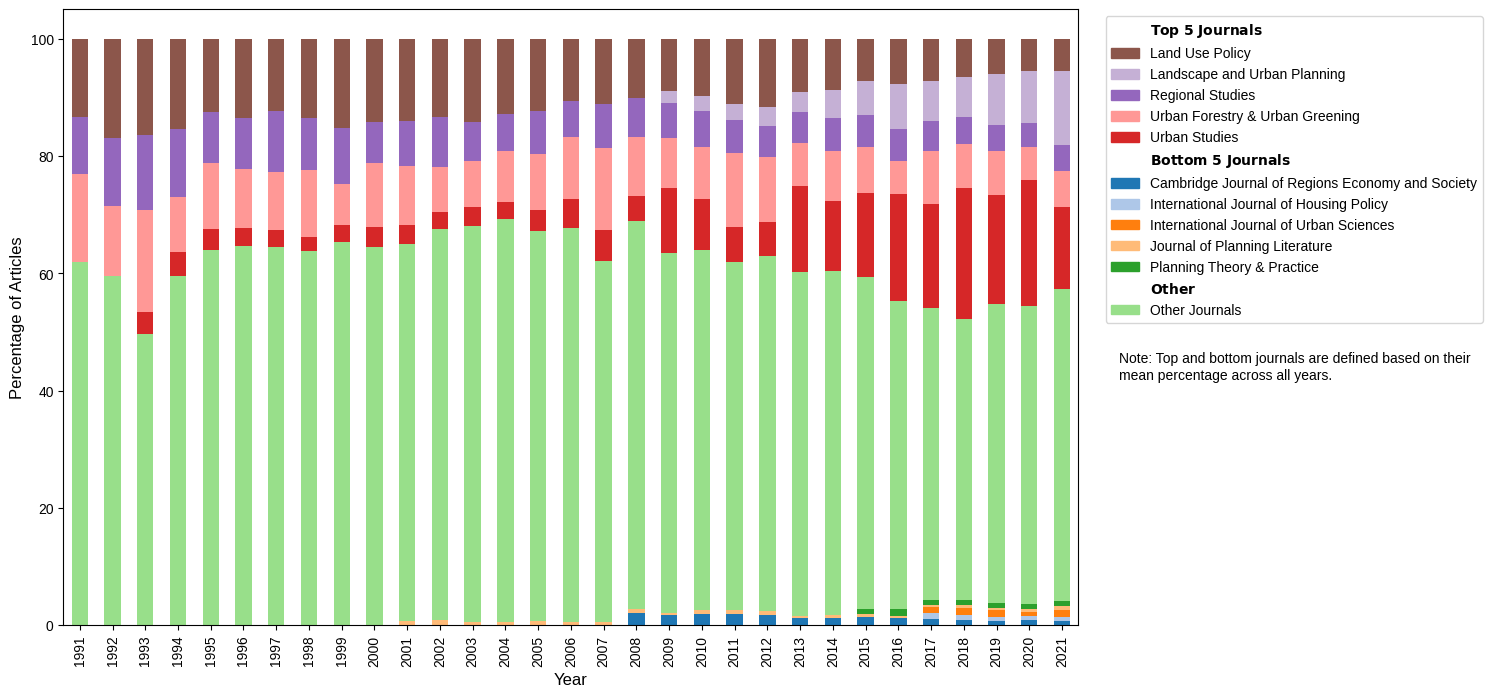

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Set font settings
plt.rcParams['font.family'] = 'Liberation Sans'
plt.rcParams['font.size'] = 12

# Calculate the mean percentage for each journal across all years
journal_means = df_summary.groupby('fm_journal')['percentage'].mean()

# Get top 5 and bottom 5 journals
top_journals = journal_means.nlargest(5).index
bottom_journals = journal_means.nsmallest(5).index

# Create a copy of the original DataFrame
df_modified = df_summary.copy()

# Create 'Journal Category' column
def categorize_journal(row):
    if row['fm_journal'] in top_journals:
        return f"Top: {row['fm_journal']}"  # Add prefix for top journals
    elif row['fm_journal'] in bottom_journals:
        return f"Bottom: {row['fm_journal']}"  # Add prefix for bottom journals
    else:
        return 'Other Journals'

df_modified['journal_category'] = df_modified.apply(categorize_journal, axis=1)

# Group by Year and journal_category, summing the percentages
df_grouped = df_modified.groupby(['Year', 'journal_category'])['percentage'].sum().reset_index()

# Pivot the data for plotting
bar_chart_data = df_grouped.pivot(
    index='Year',
    columns='journal_category',
    values='percentage'
)

# Organize columns: first bottom journals, then other, then top journals
top_cols = [col for col in bar_chart_data.columns if col.startswith('Top')]
bottom_cols = [col for col in bar_chart_data.columns if col.startswith('Bottom')]
other_cols = [col for col in bar_chart_data.columns if col == 'Other Journals']

# Combine in desired order
column_order = bottom_cols + other_cols + top_cols
bar_chart_data = bar_chart_data[column_order]

# Define color palette
colors_tab20 = plt.cm.tab20.colors
colors_tab20b = plt.cm.tab20b.colors
colors_tab20c = plt.cm.tab20c.colors
colors = colors_tab20 + colors_tab20b + colors_tab20c
colors = colors[:len(bar_chart_data.columns)]

# Create figure with more height to accommodate note
fig, ax = plt.subplots(figsize=(14, 8))

# Plot bar chart
bar_chart_data.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=colors
)

plt.xlabel('Year')
plt.ylabel('Percentage of Articles')

# Create legend with sections
legend_elements = []

# Add Top 5 Journals section
legend_elements.append(Patch(color='none', label=r'$\bf{Top\ 5\ Journals}$', alpha=0))
for i, col in enumerate(top_cols):
    legend_elements.append(Patch(color=colors[-(i+1)], label=col.replace('Top: ', '')))

# Add Bottom 5 Journals section
legend_elements.append(Patch(color='none', label=r'$\bf{Bottom\ 5\ Journals}$', alpha=0))
for i, col in enumerate(bottom_cols):
    legend_elements.append(Patch(color=colors[i], label=col.replace('Bottom: ', '')))

# Add Other Journals section
legend_elements.append(Patch(color='none', label=r'$\bf{Other}$', alpha=0))
legend_elements.append(Patch(color=colors[len(bottom_cols)], label='Other Journals'))

# Create legend
legend = ax.legend(
    handles=legend_elements,
    labels=[le.get_label() for le in legend_elements],
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    labelspacing=0.5
)

# Add note below legend
note_text = ("Note: Top and bottom journals are defined based on their \nmean percentage across all years.")
plt.gcf().text(
    1.04,  # x position (same as legend)
    0.4,   # y position (adjust as needed)
    note_text,
    fontsize=10,
    fontfamily='Liberation Sans',
    transform=ax.transAxes,
    bbox=dict(facecolor='white',
             edgecolor='none',
             alpha=0.8,
             pad=2.0)
)

# Adjust layout to make room for legend and note
plt.subplots_adjust(right=0.85)

# Save the figure with high resolution
plt.savefig('bar_chart_high_res.pdf',
            format='pdf',
            dpi=600,
            bbox_inches='tight')

plt.show()

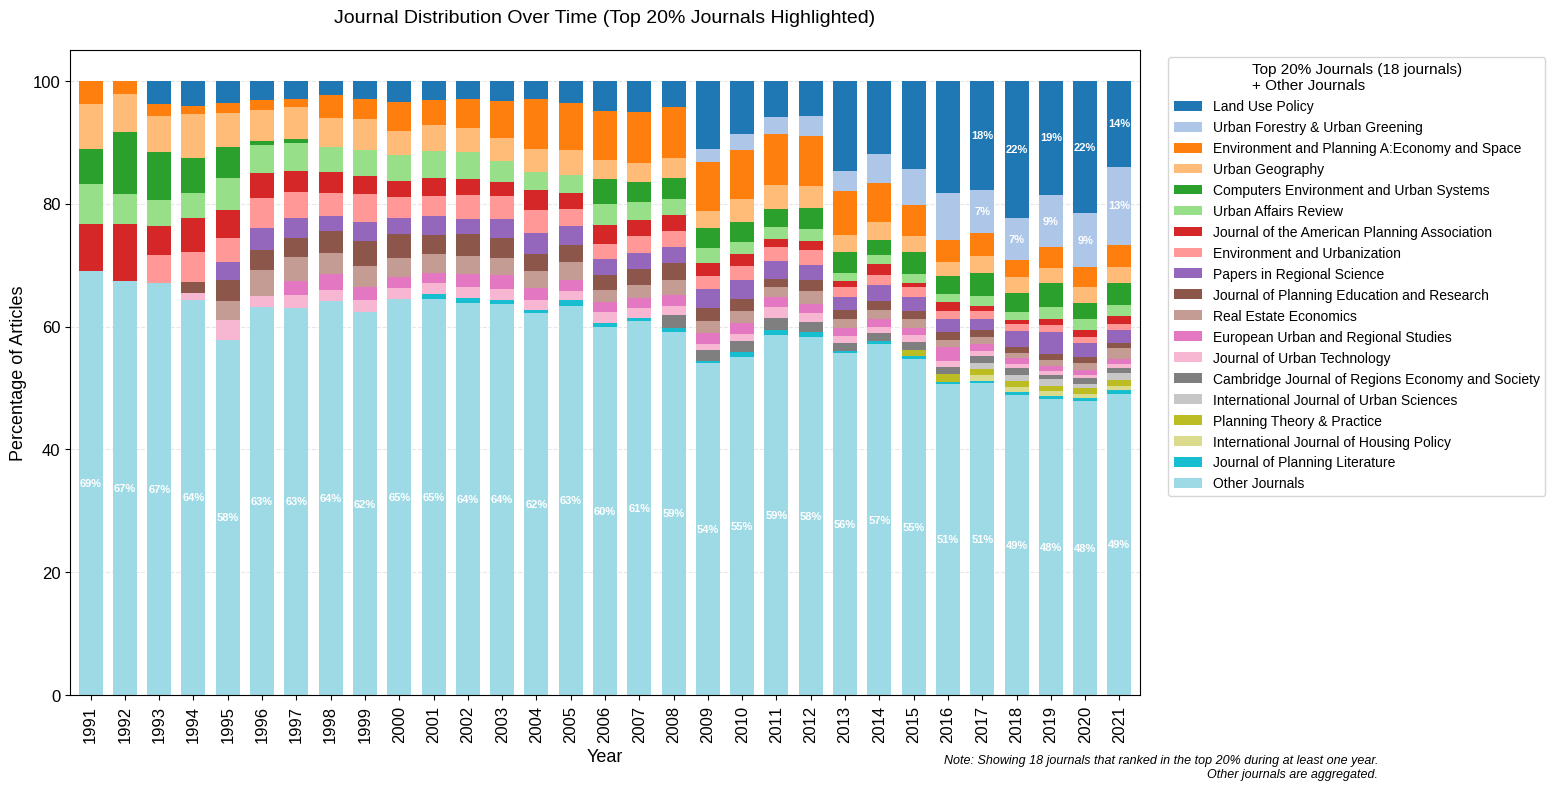

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set font settings
plt.rcParams['font.family'] = 'Liberation Sans'
plt.rcParams['font.size'] = 12

# Identify journals that were ever in top 20% for any year
top_20_journals = set()
for year in df_summary['Year'].unique():
    year_data = df_summary[df_summary['Year'] == year].copy()
    year_data['rank'] = year_data['percentage'].rank(ascending=False, pct=True)
    top_20_this_year = year_data[year_data['rank'] >= 0.8]['fm_journal'].tolist()
    top_20_journals.update(top_20_this_year)

# Create modified DataFrame with categories
df_modified = df_summary.copy()
df_modified['journal_category'] = df_modified['fm_journal'].apply(
    lambda x: x if x in top_20_journals else 'Other Journals'
)

# Group and pivot for stacked bar chart
df_grouped = df_modified.groupby(['Year', 'journal_category'])['percentage'].sum().reset_index()
bar_chart_data = df_grouped.pivot(index='Year', columns='journal_category', values='percentage')

# Sort columns by mean percentage (lowest first for bottom stacking), with 'Other' first
journal_means = {col: bar_chart_data[col].mean() for col in bar_chart_data.columns if col != 'Other Journals'}
sorted_journals = sorted(journal_means.keys(), key=journal_means.get)  # ascending order
if 'Other Journals' in bar_chart_data.columns:
    sorted_journals.insert(0, 'Other Journals')  # Put 'Other' at the beginning
bar_chart_data = bar_chart_data[sorted_journals]

# Create color palette (reverse colors to match the stacking order)
n_colors = len(bar_chart_data.columns)
if n_colors <= 20:
    colors = plt.cm.tab20(np.linspace(0, 1, n_colors))
else:
    # Combine multiple colormaps for more colors
    colors = list(plt.cm.tab20.colors) + list(plt.cm.tab20b.colors) + list(plt.cm.tab20c.colors)
    colors = colors[:n_colors]

# Reverse colors so highest performers get the first colors
colors = list(reversed(colors))

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))

# Plot stacked bar chart
bar_chart_data.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.7)

# Customize plot
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Percentage of Articles', fontsize=13)
ax.set_title('Journal Distribution Over Time (Top 20% Journals Highlighted)', fontsize=14, pad=20)

# Create compact legend (reverse order to match top-to-bottom display)
n_top_journals = len(sorted_journals) - (1 if 'Other Journals' in sorted_journals else 0)
legend_title = f'Top 20% Journals ({n_top_journals} journals)\n+ Other Journals'

# Create custom legend with correct colors
from matplotlib.patches import Patch
legend_elements = []
for i, col in enumerate(reversed(bar_chart_data.columns)):
    # The colors are already reversed, so we need to map them correctly
    color_idx = len(bar_chart_data.columns) - 1 - i
    legend_elements.append(Patch(facecolor=colors[color_idx], label=col))

ax.legend(handles=legend_elements, bbox_to_anchor=(1.02, 1), loc='upper left',
         title=legend_title, title_fontsize=11,
         fontsize=10, frameon=True, fancybox=True)

# Add grid for better readability
ax.yaxis.grid(True, linestyle='--', alpha=0.3)
ax.set_axisbelow(True)

# Add percentage labels on bars (optional, for top contributors only)
for year_idx, year in enumerate(bar_chart_data.index):
    cum_height = 0
    for col in bar_chart_data.columns:
        height = bar_chart_data.loc[year, col]
        if height > 5:  # Only label segments > 5%
            ax.text(year_idx, cum_height + height/2, f'{height:.0f}%',
                   ha='center', va='center', fontsize=8, color='white', fontweight='bold')
        cum_height += height

# Add note
note_text = (f"Note: Showing {n_top_journals} journals that ranked in the top 20% "
            "during at least one year.\nOther journals are aggregated.")
fig.text(0.99, 0.02, note_text, ha='right', fontsize=9,
        style='italic', wrap=True)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(right=0.82, bottom=0.12)

# Save figure
plt.savefig('journal_distribution_top20.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()

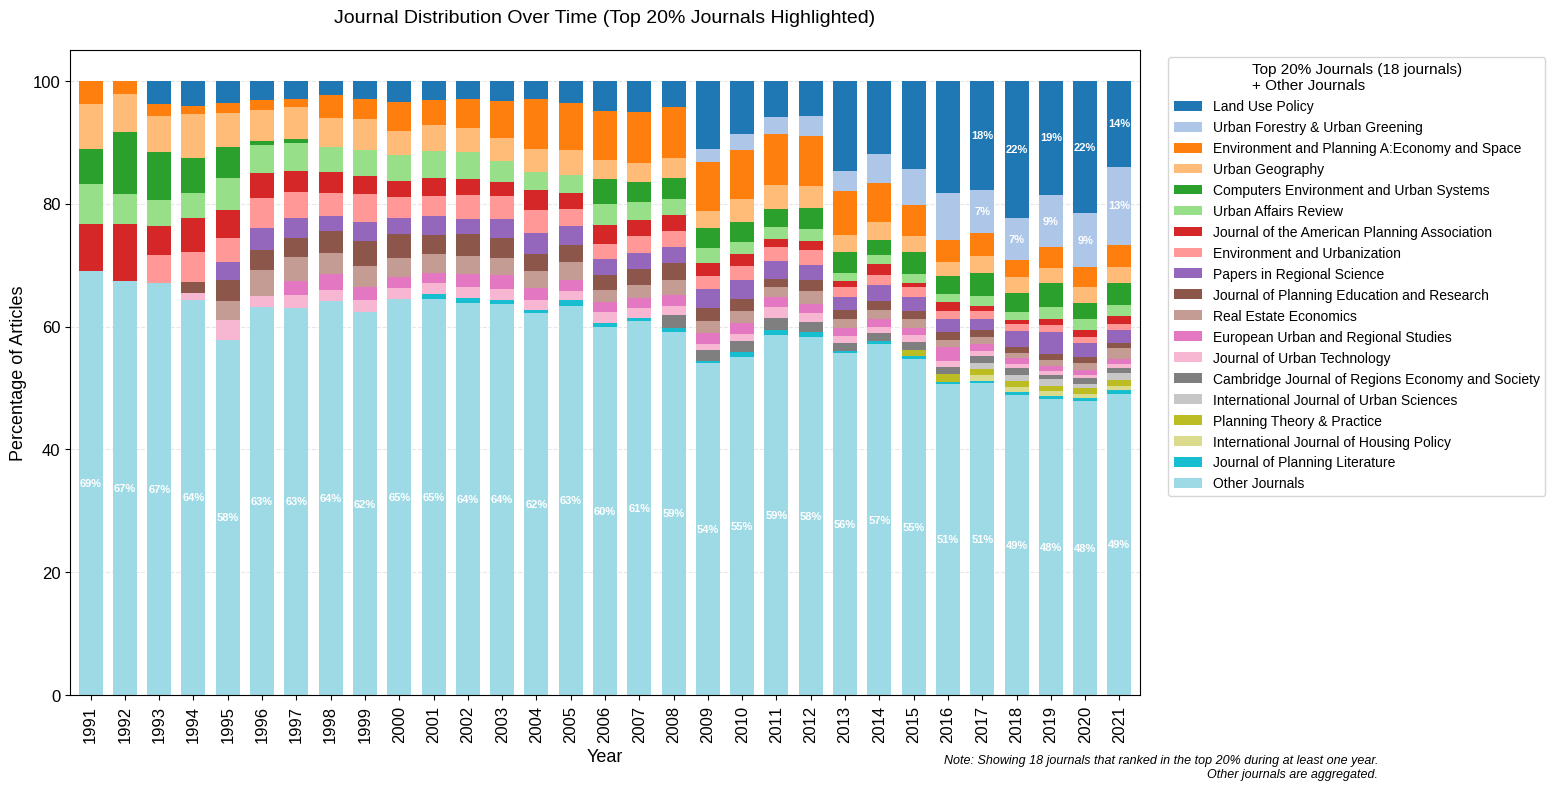


JOURNAL SHARE VERIFICATION TABLE

Summary Statistics for All Journals:
                                                             Rank  Mean %  Min %  Max %  Years  Top 20%
fm_journal                                                                                             
Urban Studies                                                   1   11.17   5.42  16.90     31    False
Landscape and Urban Planning                                    2    9.63   5.54  17.41     31    False
Land Use Policy                                                 3    8.32   2.38  22.31     29     True
Regional Studies                                                4    7.21   4.21  12.79     31    False
Urban Forestry & Urban Greening                                 5    5.83   2.00  12.68     13     True
European Planning Studies                                       6    5.63   3.58   7.29     22    False
Cities                                                          7    5.52   2.52  12.82     28  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set font settings
plt.rcParams['font.family'] = 'Liberation Sans'
plt.rcParams['font.size'] = 12

# Identify journals that were ever in top 20% for any year
top_20_journals = set()
for year in df_summary['Year'].unique():
    year_data = df_summary[df_summary['Year'] == year].copy()
    year_data['rank'] = year_data['percentage'].rank(ascending=False, pct=True)
    top_20_this_year = year_data[year_data['rank'] >= 0.8]['fm_journal'].tolist()
    top_20_journals.update(top_20_this_year)

# Create modified DataFrame with categories
df_modified = df_summary.copy()
df_modified['journal_category'] = df_modified['fm_journal'].apply(
    lambda x: x if x in top_20_journals else 'Other Journals'
)

# Group and pivot for stacked bar chart
df_grouped = df_modified.groupby(['Year', 'journal_category'])['percentage'].sum().reset_index()
bar_chart_data = df_grouped.pivot(index='Year', columns='journal_category', values='percentage')

# Sort columns by mean percentage (lowest first for bottom stacking), with 'Other' first
journal_means = {col: bar_chart_data[col].mean() for col in bar_chart_data.columns if col != 'Other Journals'}
sorted_journals = sorted(journal_means.keys(), key=journal_means.get)  # ascending order
if 'Other Journals' in bar_chart_data.columns:
    sorted_journals.insert(0, 'Other Journals')  # Put 'Other' at the beginning
bar_chart_data = bar_chart_data[sorted_journals]

# Create color palette (reverse colors to match the stacking order)
n_colors = len(bar_chart_data.columns)
if n_colors <= 20:
    colors = plt.cm.tab20(np.linspace(0, 1, n_colors))
else:
    # Combine multiple colormaps for more colors
    colors = list(plt.cm.tab20.colors) + list(plt.cm.tab20b.colors) + list(plt.cm.tab20c.colors)
    colors = colors[:n_colors]

# Reverse colors so highest performers get the first colors
colors = list(reversed(colors))

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))

# Plot stacked bar chart
bar_chart_data.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.7)

# Customize plot
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Percentage of Articles', fontsize=13)
ax.set_title('Journal Distribution Over Time (Top 20% Journals Highlighted)', fontsize=14, pad=20)

# Create compact legend (reverse order to match top-to-bottom display)
n_top_journals = len(sorted_journals) - (1 if 'Other Journals' in sorted_journals else 0)
legend_title = f'Top 20% Journals ({n_top_journals} journals)\n+ Other Journals'

# Create custom legend with correct colors
from matplotlib.patches import Patch
legend_elements = []
for i, col in enumerate(reversed(bar_chart_data.columns)):
    # The colors are already reversed, so we need to map them correctly
    color_idx = len(bar_chart_data.columns) - 1 - i
    legend_elements.append(Patch(facecolor=colors[color_idx], label=col))

ax.legend(handles=legend_elements, bbox_to_anchor=(1.02, 1), loc='upper left',
         title=legend_title, title_fontsize=11,
         fontsize=10, frameon=True, fancybox=True)

# Add grid for better readability
ax.yaxis.grid(True, linestyle='--', alpha=0.3)
ax.set_axisbelow(True)

# Add percentage labels on bars (optional, for top contributors only)
for year_idx, year in enumerate(bar_chart_data.index):
    cum_height = 0
    for col in bar_chart_data.columns:
        height = bar_chart_data.loc[year, col]
        if height > 5:  # Only label segments > 5%
            ax.text(year_idx, cum_height + height/2, f'{height:.0f}%',
                   ha='center', va='center', fontsize=8, color='white', fontweight='bold')
        cum_height += height

# Add note
note_text = (f"Note: Showing {n_top_journals} journals that ranked in the top 20% "
            "during at least one year.\nOther journals are aggregated.")
fig.text(0.99, 0.02, note_text, ha='right', fontsize=9,
        style='italic', wrap=True)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(right=0.82, bottom=0.12)

# Save figure
plt.savefig('journal_distribution_top20.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()

# Generate verification table
print("\n" + "="*80)
print("JOURNAL SHARE VERIFICATION TABLE")
print("="*80)

# Calculate mean percentage for each journal
journal_stats = df_summary.groupby('fm_journal')['percentage'].agg(['mean', 'min', 'max', 'count']).round(2)
journal_stats = journal_stats.sort_values('mean', ascending=False)

# Add ranking
journal_stats['rank'] = range(1, len(journal_stats) + 1)

# Identify if journal is in top 20%
journal_stats['in_top_20%'] = journal_stats.index.isin(top_20_journals)

# Reorder columns
journal_stats = journal_stats[['rank', 'mean', 'min', 'max', 'count', 'in_top_20%']]
journal_stats.columns = ['Rank', 'Mean %', 'Min %', 'Max %', 'Years', 'Top 20%']

print("\nSummary Statistics for All Journals:")
print(journal_stats.to_string())

# Create year-by-year breakdown for top journals
print("\n" + "="*80)
print("YEAR-BY-YEAR BREAKDOWN FOR TOP 20% JOURNALS")
print("="*80)

# Pivot table for top journals only
top_journals_data = df_summary[df_summary['fm_journal'].isin(top_20_journals)]
year_breakdown = top_journals_data.pivot(index='fm_journal', columns='Year', values='percentage')
year_breakdown = year_breakdown.fillna(0).round(1)

# Sort by mean percentage
year_breakdown['Mean'] = year_breakdown.mean(axis=1).round(1)
year_breakdown = year_breakdown.sort_values('Mean', ascending=False)

print("\nPercentage by Year for Top 20% Journals:")
print(year_breakdown.to_string())

# Summary of aggregated categories
print("\n" + "="*80)
print("AGGREGATED CATEGORIES VERIFICATION")
print("="*80)

category_summary = df_modified.groupby(['Year', 'journal_category'])['percentage'].sum().round(1)
category_pivot = category_summary.unstack(fill_value=0)

# Calculate totals
category_pivot['Total'] = category_pivot.sum(axis=1).round(1)

print("\nAggregated Percentages by Category and Year:")
print(category_pivot.to_string())

# Check if totals sum to 100%
print("\n" + "="*80)
print("DATA INTEGRITY CHECK")
print("="*80)
yearly_totals = df_summary.groupby('Year')['percentage'].sum().round(1)
print("\nTotal percentage by year (should be 100%):")
print(yearly_totals.to_string())

print("\n" + "="*80)
print(f"Total number of unique journals: {df_summary['fm_journal'].nunique()}")
print(f"Number of journals in top 20% (shown individually): {len(top_20_journals)}")
print(f"Number of journals in 'Other' category: {df_summary['fm_journal'].nunique() - len(top_20_journals)}")
print("="*80)

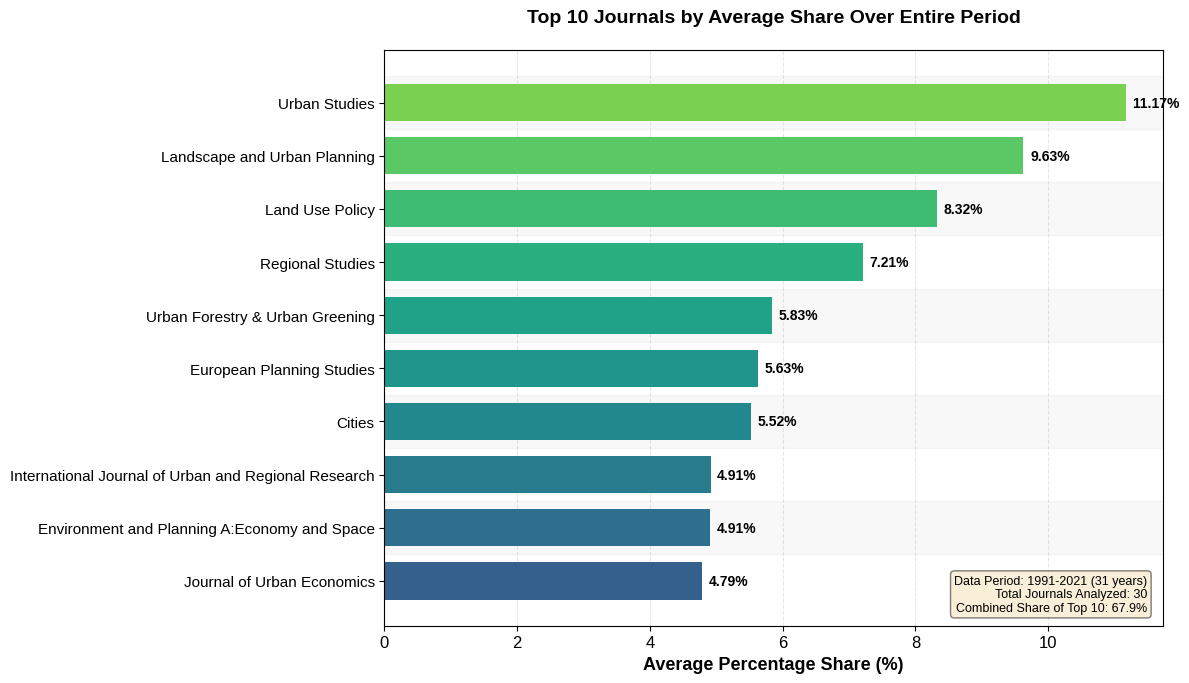


TOP 10 JOURNALS - DETAILED STATISTICS
 Rank                                              Journal  Mean %  Std Dev  Min %  Max %  Range  Years Present  Coefficient of Variation
    1                                        Urban Studies   11.17     3.29   5.42  16.90  11.48             31                     29.48
    2                         Landscape and Urban Planning    9.63     2.67   5.54  17.41  11.87             31                     27.72
    3                                      Land Use Policy    8.32     6.50   2.38  22.31  19.93             29                     78.09
    4                                     Regional Studies    7.21     2.30   4.21  12.79   8.58             31                     31.89
    5                      Urban Forestry & Urban Greening    5.83     3.13   2.00  12.68  10.68             13                     53.59
    6                            European Planning Studies    5.63     1.13   3.58   7.29   3.71             22                     2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set font settings
plt.rcParams['font.family'] = 'Liberation Sans'
plt.rcParams['font.size'] = 12

# Calculate mean percentage for each journal across all years
journal_means = df_summary.groupby('fm_journal')['percentage'].mean().sort_values(ascending=False)

# Get top 10 journals
top_10_journals = journal_means.head(10)

# Create figure with golden ratio proportions
fig, ax = plt.subplots(figsize=(12, 7))

# Create color gradient for bars (from dark to light)
colors = plt.cm.viridis(np.linspace(0.8, 0.3, 10))

# Create horizontal bar chart
bars = ax.barh(range(len(top_10_journals)), top_10_journals.values, color=colors, height=0.7)

# Customize the plot
ax.set_yticks(range(len(top_10_journals)))
ax.set_yticklabels(top_10_journals.index, fontsize=11)
ax.set_xlabel('Average Percentage Share (%)', fontsize=13, fontweight='bold')
ax.set_title('Top 10 Journals by Average Share Over Entire Period', fontsize=14, fontweight='bold', pad=20)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, top_10_journals.values)):
    ax.text(value + 0.1, bar.get_y() + bar.get_height()/2,
            f'{value:.2f}%', va='center', fontsize=10, fontweight='bold')

# Add grid for better readability
ax.xaxis.grid(True, linestyle='--', alpha=0.3)
ax.set_axisbelow(True)

# Invert y-axis to show highest at top
ax.invert_yaxis()

# Add subtle background shading for rank groups
for i in range(0, 10, 2):
    ax.axhspan(i-0.5, i+0.5, alpha=0.05, color='gray', zorder=0)

# Calculate and display period information
years = df_summary['Year'].unique()
min_year, max_year = years.min(), years.max()
n_years = len(years)

# Add information box
info_text = (f"Data Period: {min_year}-{max_year} ({n_years} years)\n"
             f"Total Journals Analyzed: {df_summary['fm_journal'].nunique()}\n"
             f"Combined Share of Top 10: {top_10_journals.sum():.1f}%")

ax.text(0.98, 0.02, info_text, transform=ax.transAxes,
        fontsize=9, ha='right', va='bottom',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Adjust layout
plt.tight_layout()

# Save figure
plt.savefig('top10_journals_average_share.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()

# Generate detailed statistics table
print("\n" + "="*80)
print("TOP 10 JOURNALS - DETAILED STATISTICS")
print("="*80)

# Create comprehensive stats for top 10
top_10_stats = pd.DataFrame()
for journal in top_10_journals.index:
    journal_data = df_summary[df_summary['fm_journal'] == journal]['percentage']

    stats = {
        'Journal': journal,
        'Mean %': journal_data.mean(),
        'Std Dev': journal_data.std(),
        'Min %': journal_data.min(),
        'Max %': journal_data.max(),
        'Range': journal_data.max() - journal_data.min(),
        'Years Present': len(journal_data),
        'Coefficient of Variation': (journal_data.std() / journal_data.mean() * 100) if journal_data.mean() > 0 else 0
    }
    top_10_stats = pd.concat([top_10_stats, pd.DataFrame([stats])], ignore_index=True)

# Format the statistics
top_10_stats['Rank'] = range(1, 11)
top_10_stats = top_10_stats[['Rank', 'Journal', 'Mean %', 'Std Dev', 'Min %', 'Max %', 'Range', 'Years Present', 'Coefficient of Variation']]

# Round numerical columns
for col in ['Mean %', 'Std Dev', 'Min %', 'Max %', 'Range', 'Coefficient of Variation']:
    top_10_stats[col] = top_10_stats[col].round(2)

print(top_10_stats.to_string(index=False))

# Year-over-year trend for top 10
print("\n" + "="*80)
print("YEAR-OVER-YEAR PERCENTAGES FOR TOP 10 JOURNALS")
print("="*80)

top_10_yearly = df_summary[df_summary['fm_journal'].isin(top_10_journals.index)]
yearly_pivot = top_10_yearly.pivot(index='fm_journal', columns='Year', values='percentage')
yearly_pivot = yearly_pivot.fillna(0).round(2)

# Sort by mean to match the bar chart order
yearly_pivot['Mean'] = yearly_pivot.mean(axis=1).round(2)
yearly_pivot = yearly_pivot.sort_values('Mean', ascending=False)

print(yearly_pivot.to_string())

# Calculate market concentration metrics
print("\n" + "="*80)
print("MARKET CONCENTRATION ANALYSIS")
print("="*80)

# Calculate cumulative share
cumulative_share = top_10_journals.cumsum()
print("\nCumulative Share of Top Journals:")
for i, (journal, cum_share) in enumerate(zip(top_10_journals.index[:5], cumulative_share[:5]), 1):
    print(f"Top {i}: {cum_share:.2f}% ({journal})")

print(f"\nTop 5 journals control: {cumulative_share.iloc[4]:.2f}% of the market")
print(f"Top 10 journals control: {cumulative_share.iloc[9]:.2f}% of the market")

# Calculate Herfindahl-Hirschman Index (HHI) for concentration
all_shares = journal_means.values
hhi = sum([(share/100)**2 for share in all_shares]) * 10000
print(f"\nHerfindahl-Hirschman Index (HHI): {hhi:.2f}")
if hhi < 1500:
    concentration = "Low concentration"
elif hhi < 2500:
    concentration = "Moderate concentration"
else:
    concentration = "High concentration"
print(f"Market concentration level: {concentration}")

In [ ]:
df_summary

,Year,fm_journal,count,total_count,percentage,category,Interval
0,1991,Computers Environment and Urban Systems,23,403,5.707196,Other Journals,1991-2000
1,1991,Environment and Planning A:Economy and Space,15,403,3.722084,Environment and Planning A:Economy and Space,1991-2000
2,1991,International Journal of Urban and Regional Re...,33,403,8.188586,International Journal of Urban and Regional Re...,1991-2000
3,1991,Journal of Urban Economics,52,403,12.903226,Journal of Urban Economics,1991-2000
4,1991,Journal of the American Planning Association,31,403,7.692308,Other Journals,1991-2000
...,...,...,...,...,...,...,...
701,2021,Regional Studies,141,3210,4.392523,Regional Studies,2019-2021
702,2021,Urban Affairs Review,57,3210,1.775701,Other Journals,2019-2021
703,2021,Urban Forestry & Urban Greening,407,3210,12.679128,Urban Forestry & Urban Greening,2019-2021
704,2021,Urban Geography,84,3210,2.616822,Other Journals,2019-2021


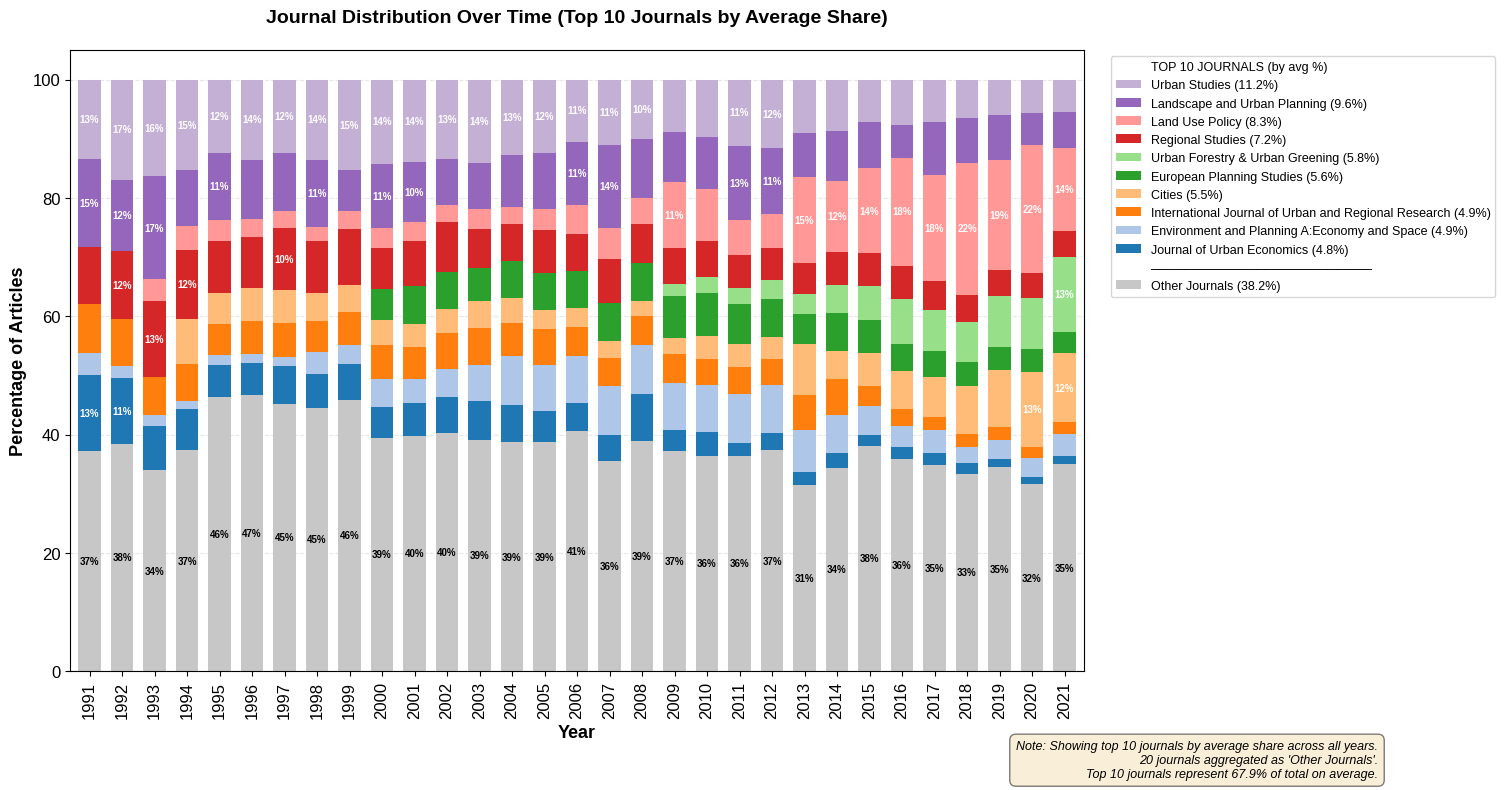


TOP 10 JOURNALS - RANKING AND STATISTICS
 Rank                                              Journal  Mean %  Min %  Max %  Std Dev  Years
    1                                        Urban Studies   11.17   5.42  16.90     3.29     31
    2                         Landscape and Urban Planning    9.63   5.54  17.41     2.67     31
    3                                      Land Use Policy    8.32   2.38  22.31     6.50     29
    4                                     Regional Studies    7.21   4.21  12.79     2.30     31
    5                      Urban Forestry & Urban Greening    5.83   2.00  12.68     3.13     13
    6                            European Planning Studies    5.63   3.58   7.29     1.13     22
    7                                               Cities    5.52   2.52  12.82     2.62     28
    8 International Journal of Urban and Regional Research    4.91   1.80   8.19     1.66     31
    9         Environment and Planning A:Economy and Space    4.91   1.29   8.35     

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Set font settings
plt.rcParams['font.family'] = 'Liberation Sans'
plt.rcParams['font.size'] = 12

# Calculate mean percentage for each journal across all years
journal_means = df_summary.groupby('fm_journal')['percentage'].mean()
top_10_journals = journal_means.nlargest(10).index

# Create modified DataFrame with categories
df_modified = df_summary.copy()
df_modified['journal_category'] = df_modified['fm_journal'].apply(
    lambda x: x if x in top_10_journals else 'Other Journals'
)

# Group and pivot for stacked bar chart
df_grouped = df_modified.groupby(['Year', 'journal_category'])['percentage'].sum().reset_index()
bar_chart_data = df_grouped.pivot(index='Year', columns='journal_category', values='percentage')

# Sort columns by mean percentage (lowest first for bottom stacking), with 'Other' first
journal_means_dict = {col: bar_chart_data[col].mean() for col in bar_chart_data.columns if col != 'Other Journals'}
sorted_journals = sorted(journal_means_dict.keys(), key=journal_means_dict.get)  # ascending order
if 'Other Journals' in bar_chart_data.columns:
    sorted_journals.insert(0, 'Other Journals')  # Put 'Other' at the beginning
bar_chart_data = bar_chart_data[sorted_journals]

# Create color palette using tab20
n_colors = len(bar_chart_data.columns)
# Use tab20 colormap - reserve a muted color for "Other", use vibrant ones for top 10
tab20_colors = plt.cm.tab20.colors
# Use the last gray-ish color from tab20 for "Other Journals", then use the first 10 colors for top journals
colors = [tab20_colors[15]]  # Gray color for "Other Journals"
# Add the first 10 colors from tab20 for top 10 journals
colors.extend(tab20_colors[:n_colors-1])

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))

# Plot stacked bar chart
bar_chart_data.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.7)

# Customize plot
ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Percentage of Articles', fontsize=13, fontweight='bold')
ax.set_title('Journal Distribution Over Time (Top 10 Journals by Average Share)', fontsize=14, fontweight='bold', pad=20)

# Create custom legend (reverse order to show highest at top)
legend_elements = []
legend_labels = []

# Add header for Top 10
legend_elements.append(Patch(color='none', label=''))
legend_labels.append('TOP 10 JOURNALS (by avg %)')

# Add top 10 journals in descending order of mean percentage
top_10_sorted = sorted([(col, journal_means_dict[col]) for col in journal_means_dict.keys()],
                      key=lambda x: x[1], reverse=True)

for journal, mean_pct in top_10_sorted:
    col_idx = sorted_journals.index(journal)
    legend_elements.append(Patch(facecolor=colors[col_idx], label=''))
    legend_labels.append(f'{journal} ({mean_pct:.1f}%)')

# Add separator
legend_elements.append(Patch(color='none', label=''))
legend_labels.append('─' * 25)

# Add Other Journals
legend_elements.append(Patch(facecolor=colors[0], label=''))
other_mean = bar_chart_data['Other Journals'].mean() if 'Other Journals' in bar_chart_data.columns else 0
legend_labels.append(f'Other Journals ({other_mean:.1f}%)')

ax.legend(handles=legend_elements, labels=legend_labels,
         bbox_to_anchor=(1.02, 1), loc='upper left',
         fontsize=9, frameon=True, fancybox=True)

# Add grid for better readability
ax.yaxis.grid(True, linestyle='--', alpha=0.3)
ax.set_axisbelow(True)

# Add percentage labels on bars for major segments
for year_idx, year in enumerate(bar_chart_data.index):
    cum_height = 0
    for col in bar_chart_data.columns:
        height = bar_chart_data.loc[year, col]
        if not pd.isna(height) and height > 10:  # Check for NaN and only label segments > 5%
            # Use black text for "Other Journals", white for others
            text_color = 'black' if col == 'Other Journals' else 'white'
            ax.text(year_idx, cum_height + height/2, f'{height:.0f}%',
                   ha='center', va='center', fontsize=7, color=text_color, fontweight='bold')
        if not pd.isna(height):
            cum_height += height

# Calculate statistics for note
n_other_journals = df_summary['fm_journal'].nunique() - 10
top_10_combined = sum([journal_means_dict[j] for j in journal_means_dict.keys()])

# Add informative note
note_text = (f"Note: Showing top 10 journals by average share across all years.\n"
            f"{n_other_journals} journals aggregated as 'Other Journals'.\n"
            f"Top 10 journals represent {top_10_combined:.1f}% of total on average.")
fig.text(0.99, 0.02, note_text, ha='right', fontsize=9,
        style='italic', wrap=True,
        bbox=dict(boxstyle='round,pad=0.5', facecolor='wheat', alpha=0.5))

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(right=0.78, bottom=0.15)

# Save figure
plt.savefig('journal_distribution_top10.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()

# Generate verification tables
print("\n" + "="*80)
print("TOP 10 JOURNALS - RANKING AND STATISTICS")
print("="*80)

# Create detailed stats for top 10
top_10_stats = []
for rank, journal in enumerate(journal_means.nlargest(10).index, 1):
    journal_data = df_summary[df_summary['fm_journal'] == journal]['percentage']
    stats = {
        'Rank': rank,
        'Journal': journal,
        'Mean %': journal_data.mean(),
        'Min %': journal_data.min(),
        'Max %': journal_data.max(),
        'Std Dev': journal_data.std(),
        'Years': len(journal_data)
    }
    top_10_stats.append(stats)

top_10_df = pd.DataFrame(top_10_stats)
for col in ['Mean %', 'Min %', 'Max %', 'Std Dev']:
    top_10_df[col] = top_10_df[col].round(2)

print(top_10_df.to_string(index=False))

# Year-by-year breakdown for top 10
print("\n" + "="*80)
print("YEAR-BY-YEAR BREAKDOWN - TOP 10 JOURNALS")
print("="*80)

top_10_yearly = df_summary[df_summary['fm_journal'].isin(top_10_journals)]
yearly_pivot = top_10_yearly.pivot(index='fm_journal', columns='Year', values='percentage')
yearly_pivot = yearly_pivot.fillna(0).round(1)

# Sort by mean percentage
yearly_pivot['Mean'] = yearly_pivot.mean(axis=1).round(1)
yearly_pivot = yearly_pivot.sort_values('Mean', ascending=False)

print(yearly_pivot.to_string())

# Aggregated categories verification
print("\n" + "="*80)
print("AGGREGATED DATA VERIFICATION")
print("="*80)

category_summary = df_modified.groupby(['Year', 'journal_category'])['percentage'].sum().round(1)
category_pivot = category_summary.unstack(fill_value=0)

# Show only top 10 and Other totals
verification_data = pd.DataFrame({
    'Year': bar_chart_data.index,
    'Top 10 Combined': bar_chart_data[sorted_journals[1:]].sum(axis=1).round(1),
    'Other Journals': bar_chart_data['Other Journals'].round(1) if 'Other Journals' in bar_chart_data.columns else 0,
    'Total': bar_chart_data.sum(axis=1).round(1)
})

print("\nAnnual Distribution Summary:")
print(verification_data.to_string(index=False))

# Summary statistics
print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)
print(f"Total unique journals in dataset: {df_summary['fm_journal'].nunique()}")
print(f"Journals shown individually: 10 (top by average share)")
print(f"Journals in 'Other' category: {n_other_journals}")
print(f"Average share of top 10: {top_10_combined:.1f}%")
print(f"Average share of 'Other': {other_mean:.1f}%")
print("="*80)

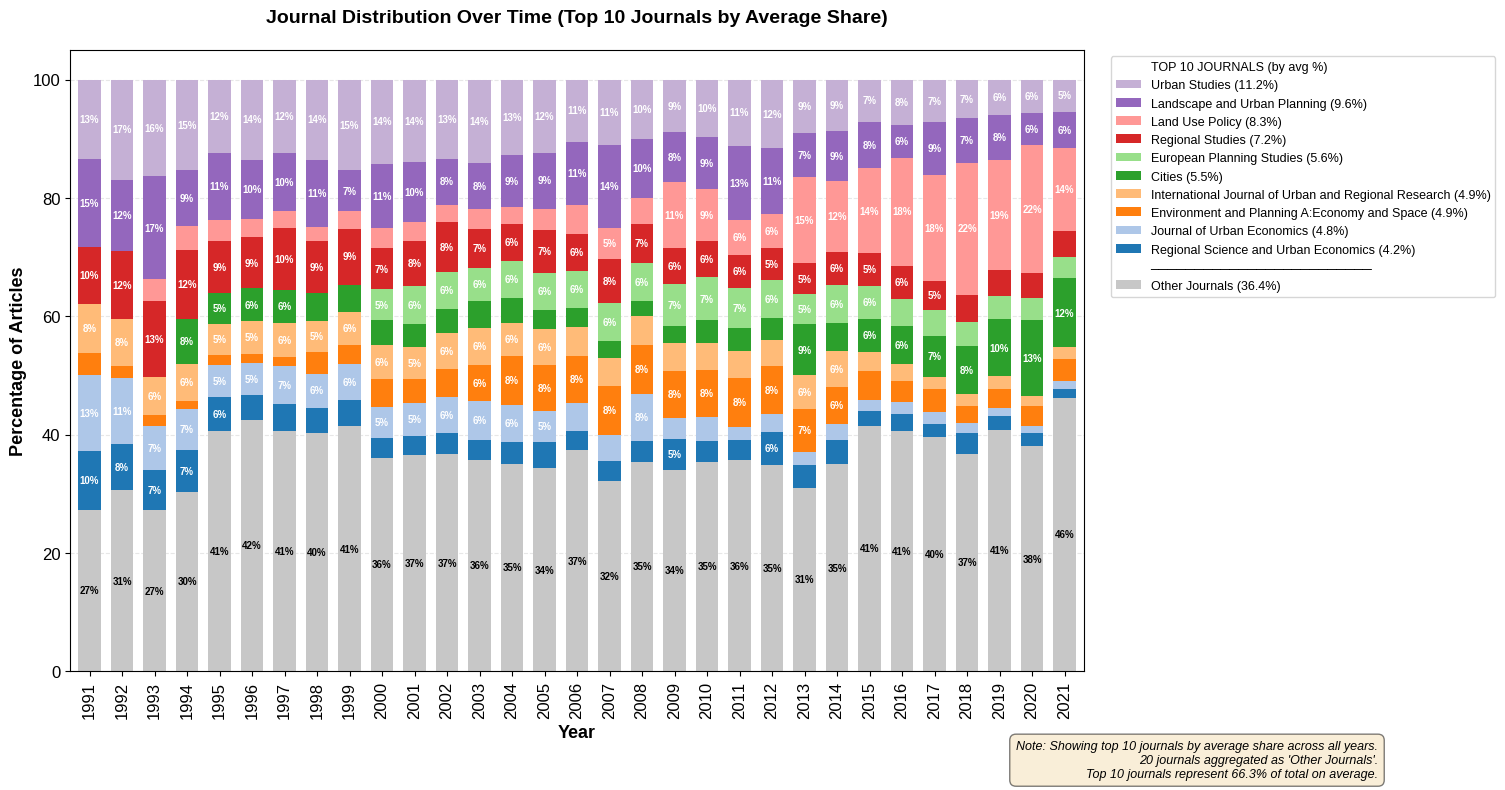


TOP 10 JOURNALS - RANKING AND STATISTICS
 Rank                                              Journal  Mean %  Min %  Max %  Std Dev  Years
    1                                        Urban Studies   11.17   5.42  16.90     3.29     31
    2                         Landscape and Urban Planning    9.63   5.54  17.41     2.67     31
    3                                      Land Use Policy    8.32   2.38  22.31     6.50     29
    4                                     Regional Studies    7.21   4.21  12.79     2.30     31
    5                                               Cities    5.52   2.52  12.82     2.62     28
    6 International Journal of Urban and Regional Research    4.91   1.80   8.19     1.66     31
    7         Environment and Planning A:Economy and Space    4.91   1.29   8.35     2.49     31
    8                           Journal of Urban Economics    4.79   1.21  12.90     2.80     31
    9                 Regional Science and Urban Economics    4.19   1.46   9.93     

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Set font settings
plt.rcParams['font.family'] = 'Liberation Sans'
plt.rcParams['font.size'] = 12

# Calculate mean percentage for each journal across ALL years (including 0s)
all_years = df_summary['Year'].unique()
all_journals = df_summary['fm_journal'].unique()

# Create a complete matrix of journal x year with 0s for missing values
journal_year_matrix = df_summary.pivot(index='fm_journal', columns='Year', values='percentage').fillna(0)

# Calculate mean across ALL years (including the 0s)
journal_means = journal_year_matrix.mean(axis=1)
top_10_journals = journal_means.nlargest(10).index

# Create modified DataFrame with categories
df_modified = df_summary.copy()
df_modified['journal_category'] = df_modified['fm_journal'].apply(
    lambda x: x if x in top_10_journals else 'Other Journals'
)

# Group and pivot for stacked bar chart
df_grouped = df_modified.groupby(['Year', 'journal_category'])['percentage'].sum().reset_index()
bar_chart_data = df_grouped.pivot(index='Year', columns='journal_category', values='percentage')

# Sort columns by mean percentage (lowest first for bottom stacking), with 'Other' first
journal_means_dict = {col: bar_chart_data[col].mean() for col in bar_chart_data.columns if col != 'Other Journals'}
sorted_journals = sorted(journal_means_dict.keys(), key=journal_means_dict.get)  # ascending order
if 'Other Journals' in bar_chart_data.columns:
    sorted_journals.insert(0, 'Other Journals')  # Put 'Other' at the beginning
bar_chart_data = bar_chart_data[sorted_journals]

# Create color palette using tab20
n_colors = len(bar_chart_data.columns)
# Use tab20 colormap - reserve a muted color for "Other", use vibrant ones for top 10
tab20_colors = plt.cm.tab20.colors
# Use the last gray-ish color from tab20 for "Other Journals", then use the first 10 colors for top journals
colors = [tab20_colors[15]]  # Gray color for "Other Journals"
# Add the first 10 colors from tab20 for top 10 journals
colors.extend(tab20_colors[:n_colors-1])

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))

# Plot stacked bar chart
bar_chart_data.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.7)

# Customize plot
ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Percentage of Articles', fontsize=13, fontweight='bold')
ax.set_title('Journal Distribution Over Time (Top 10 Journals by Average Share)', fontsize=14, fontweight='bold', pad=20)

# Create custom legend (reverse order to show highest at top)
legend_elements = []
legend_labels = []

# Add header for Top 10
legend_elements.append(Patch(color='none', label=''))
legend_labels.append('TOP 10 JOURNALS (by avg %)')

# Add top 10 journals in descending order of mean percentage
top_10_sorted = sorted([(col, journal_means_dict[col]) for col in journal_means_dict.keys()],
                      key=lambda x: x[1], reverse=True)

for journal, mean_pct in top_10_sorted:
    col_idx = sorted_journals.index(journal)
    legend_elements.append(Patch(facecolor=colors[col_idx], label=''))
    legend_labels.append(f'{journal} ({mean_pct:.1f}%)')

# Add separator
legend_elements.append(Patch(color='none', label=''))
legend_labels.append('─' * 25)

# Add Other Journals
legend_elements.append(Patch(facecolor=colors[0], label=''))
other_mean = bar_chart_data['Other Journals'].mean() if 'Other Journals' in bar_chart_data.columns else 0
legend_labels.append(f'Other Journals ({other_mean:.1f}%)')

ax.legend(handles=legend_elements, labels=legend_labels,
         bbox_to_anchor=(1.02, 1), loc='upper left',
         fontsize=9, frameon=True, fancybox=True)

# Add grid for better readability
ax.yaxis.grid(True, linestyle='--', alpha=0.3)
ax.set_axisbelow(True)

# Add percentage labels on bars for major segments
for year_idx, year in enumerate(bar_chart_data.index):
    cum_height = 0
    for col in bar_chart_data.columns:
        height = bar_chart_data.loc[year, col]
        if not pd.isna(height) and height > 5:  # Check for NaN and only label segments > 5%
            # Use black text for "Other Journals", white for others
            text_color = 'black' if col == 'Other Journals' else 'white'
            ax.text(year_idx, cum_height + height/2, f'{height:.0f}%',
                   ha='center', va='center', fontsize=7, color=text_color, fontweight='bold')
        if not pd.isna(height):
            cum_height += height

# Calculate statistics for note
n_other_journals = df_summary['fm_journal'].nunique() - 10
top_10_combined = sum([journal_means_dict[j] for j in journal_means_dict.keys()])

# Add informative note
note_text = (f"Note: Showing top 10 journals by average share across all years.\n"
            f"{n_other_journals} journals aggregated as 'Other Journals'.\n"
            f"Top 10 journals represent {top_10_combined:.1f}% of total on average.")
fig.text(0.99, 0.02, note_text, ha='right', fontsize=9,
        style='italic', wrap=True,
        bbox=dict(boxstyle='round,pad=0.5', facecolor='wheat', alpha=0.5))

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(right=0.78, bottom=0.15)

# Save figure
plt.savefig('journal_distribution_top10.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()

# Generate verification tables
print("\n" + "="*80)
print("TOP 10 JOURNALS - RANKING AND STATISTICS")
print("="*80)

# Create detailed stats for top 10
top_10_stats = []
for rank, journal in enumerate(journal_means.nlargest(10).index, 1):
    journal_data = df_summary[df_summary['fm_journal'] == journal]['percentage']
    stats = {
        'Rank': rank,
        'Journal': journal,
        'Mean %': journal_data.mean(),
        'Min %': journal_data.min(),
        'Max %': journal_data.max(),
        'Std Dev': journal_data.std(),
        'Years': len(journal_data)
    }
    top_10_stats.append(stats)

top_10_df = pd.DataFrame(top_10_stats)
for col in ['Mean %', 'Min %', 'Max %', 'Std Dev']:
    top_10_df[col] = top_10_df[col].round(2)

print(top_10_df.to_string(index=False))

# Year-by-year breakdown for top 10
print("\n" + "="*80)
print("YEAR-BY-YEAR BREAKDOWN - TOP 10 JOURNALS")
print("="*80)

top_10_yearly = df_summary[df_summary['fm_journal'].isin(top_10_journals)]
yearly_pivot = top_10_yearly.pivot(index='fm_journal', columns='Year', values='percentage')
yearly_pivot = yearly_pivot.fillna(0).round(1)

# Sort by mean percentage
yearly_pivot['Mean'] = yearly_pivot.mean(axis=1).round(1)
yearly_pivot = yearly_pivot.sort_values('Mean', ascending=False)

print(yearly_pivot.to_string())

# Aggregated categories verification
print("\n" + "="*80)
print("AGGREGATED DATA VERIFICATION")
print("="*80)

category_summary = df_modified.groupby(['Year', 'journal_category'])['percentage'].sum().round(1)
category_pivot = category_summary.unstack(fill_value=0)

# Show only top 10 and Other totals
verification_data = pd.DataFrame({
    'Year': bar_chart_data.index,
    'Top 10 Combined': bar_chart_data[sorted_journals[1:]].sum(axis=1).round(1),
    'Other Journals': bar_chart_data['Other Journals'].round(1) if 'Other Journals' in bar_chart_data.columns else 0,
    'Total': bar_chart_data.sum(axis=1).round(1)
})

print("\nAnnual Distribution Summary:")
print(verification_data.to_string(index=False))

# Summary statistics
print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)
print(f"Total unique journals in dataset: {df_summary['fm_journal'].nunique()}")
print(f"Journals shown individually: 10 (top by average share)")
print(f"Journals in 'Other' category: {n_other_journals}")
print(f"Average share of top 10: {top_10_combined:.1f}%")
print(f"Average share of 'Other': {other_mean:.1f}%")
print("="*80)

In [ ]:
df_summary

,Year,fm_journal,count,total_count,percentage,category,Interval
0,1991,Computers Environment and Urban Systems,23,403,5.707196,Other Journals,1991-2000
1,1991,Environment and Planning A:Economy and Space,15,403,3.722084,Environment and Planning A:Economy and Space,1991-2000
2,1991,International Journal of Urban and Regional Re...,33,403,8.188586,International Journal of Urban and Regional Re...,1991-2000
3,1991,Journal of Urban Economics,52,403,12.903226,Journal of Urban Economics,1991-2000
4,1991,Journal of the American Planning Association,31,403,7.692308,Other Journals,1991-2000
...,...,...,...,...,...,...,...
701,2021,Regional Studies,141,3210,4.392523,Regional Studies,2019-2021
702,2021,Urban Affairs Review,57,3210,1.775701,Other Journals,2019-2021
703,2021,Urban Forestry & Urban Greening,407,3210,12.679128,Urban Forestry & Urban Greening,2019-2021
704,2021,Urban Geography,84,3210,2.616822,Other Journals,2019-2021


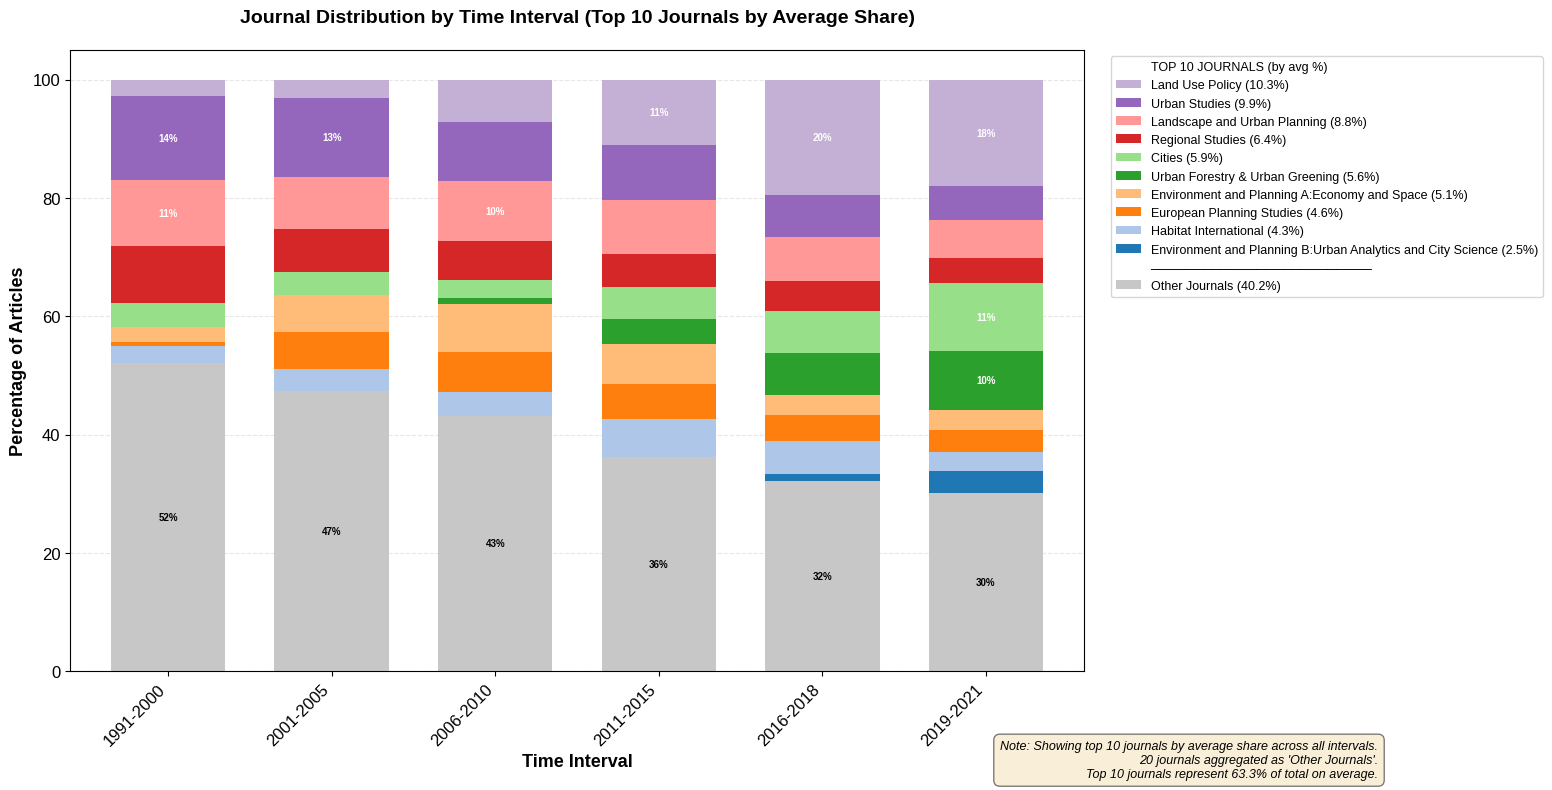


TOP 10 JOURNALS - RANKING AND STATISTICS BY INTERVAL
 Rank                                                     Journal  Mean %  Min %  Max %  Std Dev  Total Articles  Intervals
    1                                             Land Use Policy    2.13   0.29   8.10     2.37            5096         29
    2                                               Urban Studies    1.92   0.84   2.75     0.48            4123         31
    3                             Urban Forestry & Urban Greening    1.71   0.42   4.27     1.22            1976         13
    4                                Landscape and Urban Planning    1.71   0.79   2.99     0.55            3813         31
    5                                   European Planning Studies    1.26   0.70   1.66     0.20            2008         22
    6                                                      Cities    1.26   0.48   4.34     1.09            2810         28
    7                                            Regional Studies    1.23   0.

ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Set font settings
plt.rcParams['font.family'] = 'Liberation Sans'
plt.rcParams['font.size'] = 12

# Calculate total count for each journal across all intervals for percentage calculation
df_summary['total_articles'] = df_summary.groupby('Interval')['count'].transform('sum')
df_summary['percentage'] = (df_summary['count'] / df_summary['total_articles']) * 100

# Calculate mean percentage for each journal across all intervals
journal_means = df_summary.groupby('fm_journal')['percentage'].mean()
top_10_journals = journal_means.nlargest(10).index

# Create modified DataFrame with categories
df_modified = df_summary.copy()
df_modified['journal_category'] = df_modified['fm_journal'].apply(
    lambda x: x if x in top_10_journals else 'Other Journals'
)

# Group and pivot for stacked bar chart
df_grouped = df_modified.groupby(['Interval', 'journal_category'])['percentage'].sum().reset_index()
bar_chart_data = df_grouped.pivot(index='Interval', columns='journal_category', values='percentage')

# Sort columns by mean percentage (lowest first for bottom stacking), with 'Other' first
journal_means_dict = {col: bar_chart_data[col].mean() for col in bar_chart_data.columns if col != 'Other Journals'}
sorted_journals = sorted(journal_means_dict.keys(), key=journal_means_dict.get)  # ascending order
if 'Other Journals' in bar_chart_data.columns:
    sorted_journals.insert(0, 'Other Journals')  # Put 'Other' at the beginning
bar_chart_data = bar_chart_data[sorted_journals]

# Create color palette using tab20
n_colors = len(bar_chart_data.columns)
# Use tab20 colormap - reserve a muted color for "Other", use vibrant ones for top 10
tab20_colors = plt.cm.tab20.colors
# Use the last gray-ish color from tab20 for "Other Journals", then use the first 10 colors for top journals
colors = [tab20_colors[15]]  # Gray color for "Other Journals"
# Add the first 10 colors from tab20 for top 10 journals
colors.extend(tab20_colors[:n_colors-1])

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))

# Plot stacked bar chart
bar_chart_data.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.7)

# Customize plot
ax.set_xlabel('Time Interval', fontsize=13, fontweight='bold')
ax.set_ylabel('Percentage of Articles', fontsize=13, fontweight='bold')
ax.set_title('Journal Distribution by Time Interval (Top 10 Journals by Average Share)', fontsize=14, fontweight='bold', pad=20)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Create custom legend (reverse order to show highest at top)
legend_elements = []
legend_labels = []

# Add header for Top 10
legend_elements.append(Patch(color='none', label=''))
legend_labels.append('TOP 10 JOURNALS (by avg %)')

# Add top 10 journals in descending order of mean percentage
top_10_sorted = sorted([(col, journal_means_dict[col]) for col in journal_means_dict.keys()],
                      key=lambda x: x[1], reverse=True)

for journal, mean_pct in top_10_sorted:
    col_idx = sorted_journals.index(journal)
    legend_elements.append(Patch(facecolor=colors[col_idx], label=''))
    legend_labels.append(f'{journal} ({mean_pct:.1f}%)')

# Add separator
legend_elements.append(Patch(color='none', label=''))
legend_labels.append('─' * 25)

# Add Other Journals
legend_elements.append(Patch(facecolor=colors[0], label=''))
other_mean = bar_chart_data['Other Journals'].mean() if 'Other Journals' in bar_chart_data.columns else 0
legend_labels.append(f'Other Journals ({other_mean:.1f}%)')

ax.legend(handles=legend_elements, labels=legend_labels,
         bbox_to_anchor=(1.02, 1), loc='upper left',
         fontsize=9, frameon=True, fancybox=True)

# Add grid for better readability
ax.yaxis.grid(True, linestyle='--', alpha=0.3)
ax.set_axisbelow(True)

# Add percentage labels on bars for major segments
for interval_idx, interval in enumerate(bar_chart_data.index):
    cum_height = 0
    for col in bar_chart_data.columns:
        height = bar_chart_data.loc[interval, col]
        if not pd.isna(height) and height > 10:  # Only label segments > 10%
            # Use black text for "Other Journals", white for others
            text_color = 'black' if col == 'Other Journals' else 'white'
            ax.text(interval_idx, cum_height + height/2, f'{height:.0f}%',
                   ha='center', va='center', fontsize=7, color=text_color, fontweight='bold')
        if not pd.isna(height):
            cum_height += height

# Calculate statistics for note
n_other_journals = df_summary['fm_journal'].nunique() - 10
top_10_combined = sum([journal_means_dict[j] for j in journal_means_dict.keys()])

# Add informative note
note_text = (f"Note: Showing top 10 journals by average share across all intervals.\n"
            f"{n_other_journals} journals aggregated as 'Other Journals'.\n"
            f"Top 10 journals represent {top_10_combined:.1f}% of total on average.")
fig.text(0.99, 0.02, note_text, ha='right', fontsize=9,
        style='italic', wrap=True,
        bbox=dict(boxstyle='round,pad=0.5', facecolor='wheat', alpha=0.5))

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(right=0.78, bottom=0.15)

# Save figure
plt.savefig('journal_distribution_intervals.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()

# Generate verification tables
print("\n" + "="*80)
print("TOP 10 JOURNALS - RANKING AND STATISTICS BY INTERVAL")
print("="*80)

# Create detailed stats for top 10
top_10_stats = []
for rank, journal in enumerate(journal_means.nlargest(10).index, 1):
    journal_data = df_summary[df_summary['fm_journal'] == journal]['percentage']
    total_count = df_summary[df_summary['fm_journal'] == journal]['count'].sum()
    stats = {
        'Rank': rank,
        'Journal': journal,
        'Mean %': journal_data.mean(),
        'Min %': journal_data.min(),
        'Max %': journal_data.max(),
        'Std Dev': journal_data.std(),
        'Total Articles': total_count,
        'Intervals': len(journal_data)
    }
    top_10_stats.append(stats)

top_10_df = pd.DataFrame(top_10_stats)
for col in ['Mean %', 'Min %', 'Max %', 'Std Dev']:
    top_10_df[col] = top_10_df[col].round(2)

print(top_10_df.to_string(index=False))

# Interval-by-interval breakdown for top 10
print("\n" + "="*80)
print("INTERVAL-BY-INTERVAL BREAKDOWN - TOP 10 JOURNALS")
print("="*80)

top_10_interval = df_summary[df_summary['fm_journal'].isin(top_10_journals)]
interval_pivot = top_10_interval.pivot(index='fm_journal', columns='Interval', values='percentage')
interval_pivot = interval_pivot.fillna(0).round(1)

# Sort by mean percentage
interval_pivot['Mean'] = interval_pivot.mean(axis=1).round(1)
interval_pivot = interval_pivot.sort_values('Mean', ascending=False)

print(interval_pivot.to_string())

# Count-based breakdown
print("\n" + "="*80)
print("ARTICLE COUNT BREAKDOWN - TOP 10 JOURNALS")
print("="*80)

count_pivot = top_10_interval.pivot(index='fm_journal', columns='Interval', values='count')
count_pivot = count_pivot.fillna(0).astype(int)

# Sort by total count
count_pivot['Total'] = count_pivot.sum(axis=1)
count_pivot = count_pivot.sort_values('Total', ascending=False)

print(count_pivot.to_string())

# Summary statistics
print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)
print(f"Total unique journals in dataset: {df_summary['fm_journal'].nunique()}")
print(f"Journals shown individually: 10 (top by average share)")
print(f"Journals in 'Other' category: {n_other_journals}")
print(f"Average share of top 10: {top_10_combined:.1f}%")
print(f"Average share of 'Other': {other_mean:.1f}%")
print(f"Total time intervals: {len(df_summary['Interval'].unique())}")
print(f"Time intervals: {sorted(df_summary['Interval'].unique())}")
print("="*80)

In [ ]:
df_summary

,Year,fm_journal,count,total_count,percentage,category,Interval
0,1991,Computers Environment and Urban Systems,23,403,5.707196,Other Journals,1991-2000
1,1991,Environment and Planning A:Economy and Space,15,403,3.722084,Environment and Planning A:Economy and Space,1991-2000
2,1991,International Journal of Urban and Regional Re...,33,403,8.188586,International Journal of Urban and Regional Re...,1991-2000
3,1991,Journal of Urban Economics,52,403,12.903226,Journal of Urban Economics,1991-2000
4,1991,Journal of the American Planning Association,31,403,7.692308,Other Journals,1991-2000
...,...,...,...,...,...,...,...
701,2021,Regional Studies,141,3210,4.392523,Regional Studies,2019-2021
702,2021,Urban Affairs Review,57,3210,1.775701,Other Journals,2019-2021
703,2021,Urban Forestry & Urban Greening,407,3210,12.679128,Urban Forestry & Urban Greening,2019-2021
704,2021,Urban Geography,84,3210,2.616822,Other Journals,2019-2021


# 2 关系图

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np


# 获取所有节点的标签
labels = list(set(data['origin']).union(set(data['destination'])))

# 创建空的矩阵
n = len(labels)
matrix = np.zeros((n, n))

# 填充矩阵
for i in range(len(data)):
    origin_index = labels.index(data.loc[i, 'origin'])
    destination_index = labels.index(data.loc[i, 'destination'])
    matrix[origin_index][destination_index] = data.loc[i, 'weight']

# 创建弦图
fig = go.Figure(data=[go.Chord(
    matrix=matrix,
    labels=labels,
    colorscale='Viridis'
)])

# 添加布局
fig.update_layout(
    title_text='Chord Diagram from DataFrame',
    font=dict(size=14),
    showlegend=True
)

# 显示图表
fig.show()


In [ ]:
import plotly.graph_objects as go

# 数据准备
labels = ['A', 'B', 'C', 'D', 'E']
matrix = [
    [0, 10, 5, 2, 3],
    [10, 0, 3, 6, 4],
    [5, 3, 0, 8, 7],
    [2, 6, 8, 0, 1],
    [3, 4, 7, 1, 0]
]

# 创建弦图
fig = go.Figure(data=[go.Chord(
    matrix=matrix,
    labels=labels,
    colorscale='Viridis',
    colorway=["#636EFA", "#EF553B", "#00CC96", "#AB63FA", "#FFA15A"],
    line_color='black'
)])

# 添加布局
fig.update_layout(
    title_text='Customized Chord Diagram',
    font=dict(size=14),
    showlegend=True
)

# 显示图表
fig.show()


AttributeError: module 'plotly.graph_objects' has no attribute 'Chord'

In [ ]:
!pip install plotly holoviews bokeh >>output.log

In [ ]:
vdf21 = pd.read_excel('/content/drive/MyDrive/Input/Sam/Files/Result/Relatedness_author_id.xlsx',sheet_name = 'Mx91|21',index_col = 0)

In [ ]:
# 去掉最后一行
def remove_last_row(data):
  data = data.iloc[:-1, :]
  data = data.iloc[:, :-1]
  return data

vdf21 = remove_last_row(vdf21)

In [ ]:
vdf21

,6,5,2,3,8,11,4,7,1,12,10,9
6,2719,140,187,74,28,45,193,9,67,74,140,125
5,140,2524,106,33,26,53,140,36,103,69,90,103
2,187,106,3624,188,43,99,110,11,50,145,69,147
3,74,33,188,4031,82,166,188,22,56,303,157,140
8,28,26,43,82,3393,33,51,52,65,127,51,93
11,45,53,99,166,33,2018,73,47,56,129,108,80
4,193,140,110,188,51,73,3688,18,62,206,219,171
7,9,36,11,22,52,47,18,3349,65,47,69,52
1,67,103,50,56,65,56,62,65,2712,91,73,87
12,74,69,145,303,127,129,206,47,91,3965,146,161


In [ ]:
file_path = '/content/drive/MyDrive/Input/Sam/Files/Result/Relatedness_author_id.xlsx'
sheet_name = 'Tp91|21'
names = pd.read_excel(file_path, sheet_name=sheet_name, usecols=['ID', 'Name'])

In [ ]:
names

,ID,Name
0,3,T3-Socio-political geography
1,12,T12-Planning policy and community governance
2,4,T4-Housing and property market
3,2,T2-Regional economics
4,8,T8-Environmental management
5,7,T7-Landscape and forestry
6,10,T10-Neighbourhood planning
7,6,T6-Spatial effect
8,1,T1-Spatial analysis and modelling
9,5,T5-Transportation


In [ ]:
!pip install plotapi

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
vdf21

,6,5,2,3,8,11,4,7,1,12,10,9
6,2719,140,187,74,28,45,193,9,67,74,140,125
5,140,2524,106,33,26,53,140,36,103,69,90,103
2,187,106,3624,188,43,99,110,11,50,145,69,147
3,74,33,188,4031,82,166,188,22,56,303,157,140
8,28,26,43,82,3393,33,51,52,65,127,51,93
11,45,53,99,166,33,2018,73,47,56,129,108,80
4,193,140,110,188,51,73,3688,18,62,206,219,171
7,9,36,11,22,52,47,18,3349,65,47,69,52
1,67,103,50,56,65,56,62,65,2712,91,73,87
12,74,69,145,303,127,129,206,47,91,3965,146,161


In [ ]:
import pandas as pd

def remove_last_row(data):
    data = data.iloc[:-1, :]  # 移除最后一行
    data = data.iloc[:, :-1]  # 移除最后一列
    return data

def normalize_mt(value):
    # 确保数据类型为浮点数类型
    value = value.astype(float)

    # 首行作为列标签，首列作为行标签
    indices = value.columns.tolist()  # 假设首行为列标签
    row_indices = value.index.tolist()  # 假设首列为行标签

    # 创建“起点-终点”对并归一化
    od_pairs = []

    for i in range(len(value)):
        for j in range(len(value)):
            if i != j:  # 忽略对角线元素
                origin = row_indices[i]
                destination = indices[j]
                normalized_value = (value.iloc[i, j] / value.iloc[i, i])*100 # 将非对角线值除以对应的对角线值
                od_pairs.append([origin, destination, normalized_value])
            elif i == j:
                origin = row_indices[i]
                destination = indices[j]
                normalized_value = 0
                od_pairs.append([origin, destination, normalized_value])

    # 转换为DataFrame
    od_df = pd.DataFrame(od_pairs, columns=['Origin', 'Destination', 'Normalized Value'])
    # 将Origin和Destination列转换为整数类型
    od_df['Origin'] = od_df['Origin'].astype(int)
    od_df['Destination'] = od_df['Destination'].astype(int)
    # 对Origin和Destination进行排序
    od_df = od_df.sort_values(by=['Origin', 'Destination'])

    # 添加新列
    od_df['Cross-Topic Authorship (%) by Origin Topic'] = 'T' + od_df['Origin'].astype(str)
    od_df['Cross-Topic Authorship (%) by Destination Topic'] = 'T' + od_df['Destination'].astype(str)
    od_df = pd.merge(od_df, names, left_on='Origin', right_on='ID', how='left')
    od_df = od_df.drop(columns=['ID'])
    od_df = od_df.rename(columns={'Name': 'Origin Name'})
    od_df = pd.merge(od_df, names, left_on='Destination', right_on='ID', how='left')
    od_df = od_df.drop(columns=['ID'])
    od_df = od_df.rename(columns={'Name': 'Destination Name'})
    max_value = od_df['Normalized Value'].max()
    return od_df,max_value

#normalize_mt(vdf21)

In [ ]:
filepath = '/content/drive/MyDrive/Input/Sam/Files/Result/Relatedness_author_id.xlsx'
output_filepath = 'Result/nmlod_bidir_Relatedness_author_id.xlsx'

with pd.ExcelWriter(output_filepath) as writer:
    for sheet in pd.ExcelFile(filepath).sheet_names:
        if 'Mx' in sheet:

            df = pd.read_excel(filepath, sheet_name=sheet,index_col = 0, header = 0)

            # 检查数据类型
            df = df.apply(pd.to_numeric, errors='coerce')
            df = remove_last_row(df)

            try:
                od_df,max_value = normalize_mt(df)
                print(f"Max value in the {sheet}: {max_value}")
                new_sheetname = sheet.replace('Mx', 'OD')
                od_df.to_excel(writer, sheet_name=new_sheetname, index=False)
            except TypeError as e:
                print(f"Skipping sheet {sheet} due to TypeError: {e}")

print(f"Processed data saved to {output_filepath}")

Max value in the Mx91|21: 8.225966303270566
Max value in the Mx91-00: 8.677685950413224
Max value in the Mx01-05: 7.876712328767123
Max value in the Mx06-10: 5.714285714285714
Max value in the Mx11-15: 6.329113924050633
Max value in the Mx16-18: 3.966597077244259
Max value in the Mx19-21: 4.580152671755725
Processed data saved to Result/nmlod_bidir_Relatedness_author_id.xlsx


# 3 表格转换

In [ ]:
ls

Arial.ttf                          Master_Analysis.csv             Regeocoded_Institution.csv
Arial.ttf.1                        Need_Regeocode_Institution.csv  Relatedness_Locality.xlsx
Fig/                               NormOD1991-2000                 Result/
fullname2_nu_uni.csv               NormOD_1991-2021                Topics1991-2000
fullname_nu_uni.csv                NormOD2001-2005                 Topics_1991-2021
fullname_un_uni_a.csv              NormOD2006-2010                 Topics2001-2005
Geocoded_Institution_0820.csv      NormOD2011-2015                 Topics2006-2010
Geocoded_Institution_0821.csv      NormOD2016-2018                 Topics2011-2015
Geocoded_openaied_institution.csv  NormOD2019-2021                 Topics2016-2018
Geocoded_Unique_uni.csv            nu_uni_a.csv                    Topics2019-2021
Institution_frequency.csv          nu_uni.csv                      Topics.csv
Institution_needgeocode.csv        Originaldata.csv                Unique_uni.

In [ ]:
import pandas as pd

def generate_unique_od_pairs(df):
    # 定义一个函数来确保source列始终包含字母顺序较小的topic
    def create_ordered_od(row):
        return pd.Series(sorted([row['source'], row['target']]))

    # 应用函数并重新分配source和target列
    df[['source', 'target']] = df.apply(create_ordered_od, axis=1)

    # 保留唯一的OD对
    df_unique = df.drop_duplicates(subset=['source', 'target'])

    # 对去重后的OD对进行排序
    df_unique = df_unique.sort_values(by=['source', 'target'])

    # 计算标准化的权重，使每个source的权重总和等于100
    df_unique['normalized_weight'] = df_unique.groupby('source')['Weight'].transform(lambda x: 100 * x / x.sum())

    # 添加新列
    df_unique['tsource'] = 'T' + df_unique['source'].astype(str)
    df_unique['ttarget'] = 'T' + df_unique['target'].astype(str)

    return df_unique



In [ ]:
filepath = 'Result/mRelatedness_author_id.xlsx'
output_filepath = 'Result/wtodt_Relatedness_author_id_unique.xlsx'
with pd.ExcelWriter(output_filepath) as writer:
  for sheet in pd.ExcelFile(filepath).sheet_names:
    if 'OD' in sheet:
      print(sheet)
      df = pd.read_excel(filepath,sheet_name = sheet)
      df_unique = generate_unique_od_pairs(df)
      #print(df_unique)
      df_unique.to_excel(writer, sheet_name=sheet, index=False)

OD91|21


IndexError: At least one sheet must be visible

# 4 标准化表格

In [ ]:
import tqdm

In [ ]:
ls

 Arial.ttf                                  NormOD_1991-2021
 Arial.ttf.1                                NormOD2001-2005
 bar_chart_high_res.pdf                     NormOD2006-2010
 Fig/                                       NormOD2011-2015
 fullname2_nu_uni.csv                       NormOD2016-2018
 fullname_nu_uni.csv                        NormOD2019-2021
 fullname_un_uni_a.csv                      nu_uni_a.csv
 Geocoded_Institution_0820.csv              nu_uni.csv
 Geocoded_Institution_0821.csv              Originaldata.csv
 Geocoded_openaied_institution.csv          output.log
 Geocoded_Unique_uni.csv                    Regeocoded_Institution.csv
'Gill Sans.otf'                             Relatedness_Locality.xlsx
 Institution_frequency.csv                  Result/
 Institution_needgeocode.csv                top10_journals_average_share.pdf
 journal_distribution_intervals.pdf         Topics1991-2000
 journal_distribution.pdf                   Topics_1991-2021
 journal_distributio

In [ ]:
test = pd.read_csv('Result/author_id/Mx91|21.csv',index_col = 0)

In [ ]:
test

,6,5,2,3,8,11,4,7,1,12,10,9,Total
Unnamed: 0,,,,,,,,,,,,,
6,2719,140,187,74,28,45,193,9,67,74,140,125,2719
5,140,2524,106,33,26,53,140,36,103,69,90,103,2524
2,187,106,3624,188,43,99,110,11,50,145,69,147,3624
3,74,33,188,4031,82,166,188,22,56,303,157,140,4031
8,28,26,43,82,3393,33,51,52,65,127,51,93,3393
11,45,53,99,166,33,2018,73,47,56,129,108,80,2018
4,193,140,110,188,51,73,3688,18,62,206,219,171,3688
7,9,36,11,22,52,47,18,3349,65,47,69,52,3349
1,67,103,50,56,65,56,62,65,2712,91,73,87,2712


In [ ]:
import pandas as pd
import glob
import os
from tqdm import tqdm

folder = "Result/author_id/"
files = sorted(glob.glob(os.path.join(folder, "Mx*.csv")))

out_folder = "Result/author_id/normalized/"
os.makedirs(out_folder, exist_ok=True)

for f in tqdm(files, desc="Normalizing matrices"):
    period = os.path.basename(f).replace(".csv", "")
    df = pd.read_csv(f, index_col=0)

    # 去掉 Total 行和列
    df_clean = df.drop(index="Total", errors="ignore").drop(columns=["Total"], errors="ignore")

    # 分母 = Total 的总和
    total_sum = df.loc["Total", "Total"]

    # 标准化
    df_norm = df_clean / total_sum

    # 保存
    df_norm.to_csv(os.path.join(out_folder, f"{period}_norm.csv"))


Normalizing matrices: 100%|██████████| 7/7 [00:02<00:00,  2.77it/s]


Normalizing matrices:   0%|          | 0/7 [00:00<?, ?it/s]

标准化前 (部分数据):
              3   10    6    1   12   9  7  8   2   4   5  11
Unnamed: 0                                                   
3           487   12    9    3   33  15  0  4  29  14   2  14
10           12  292   20    3   13   6  2  0   5  23   4   8
6             9   20  367    4    6   8  0  0  14  18  12   3
1             3    3    4  180    8   4  5  5   9   4   5   7
12           33   13    6    8  479  11  2  4  16  19   6  11

标准化后 (部分数据):
                   3        10         6         1        12         9  \
Unnamed: 0                                                               
3           0.122516  0.003019  0.002264  0.000755  0.008302  0.003774   
10          0.003019  0.073459  0.005031  0.000755  0.003270  0.001509   
6           0.002264  0.005031  0.092327  0.001006  0.001509  0.002013   
1           0.000755  0.000755  0.001006  0.045283  0.002013  0.001006   
12          0.008302  0.003270  0.001509  0.002013  0.120503  0.002767   

                   7

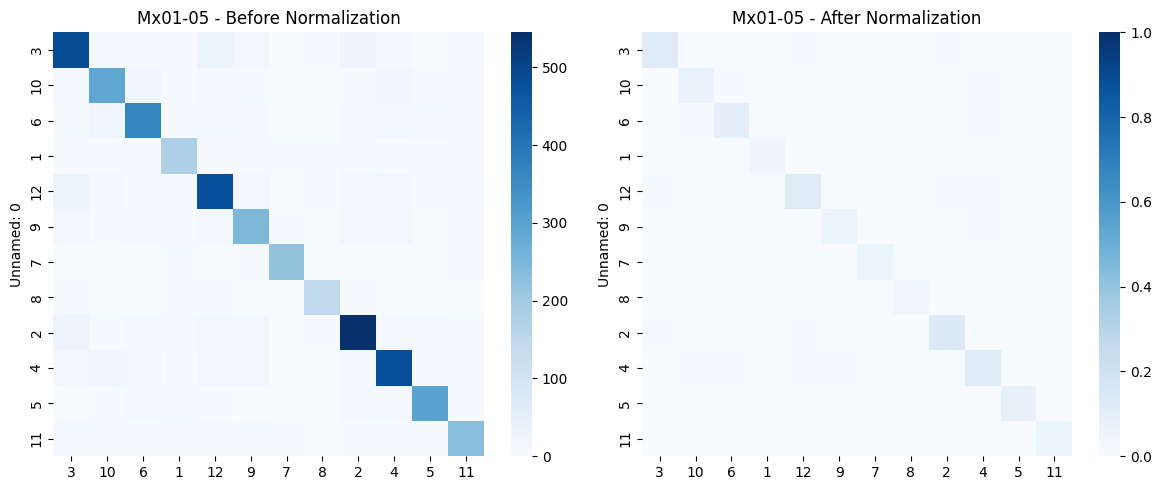

Normalizing matrices: 100%|██████████| 7/7 [00:00<00:00,  7.80it/s]


所有标准化矩阵和 total_sum_summary.csv 已保存完毕！


In [ ]:
import pandas as pd
import glob
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

folder = "Result/author_id/"
files = sorted(glob.glob(os.path.join(folder, "Mx*.csv")))

out_folder = "Result/author_id/normalized/"
os.makedirs(out_folder, exist_ok=True)

# 用来保存 total_sum
summary = []

for f in tqdm(files, desc="Normalizing matrices"):
    period = os.path.basename(f).replace(".csv", "")
    df = pd.read_csv(f, index_col=0)

    # 去掉 Total 行和列
    df_clean = df.drop(index="Total", errors="ignore").drop(columns=["Total"], errors="ignore")

    # 分母 = Total 行的和（不包括 Total 列本身）
    row_total = df.loc["Total"].drop("Total", errors="ignore")
    total_sum = row_total.sum()

    # 标准化
    df_norm = df_clean / total_sum

    # 保存标准化矩阵
    df_norm.to_csv(os.path.join(out_folder, f"{period}_norm.csv"))

    # 保存总和信息
    summary.append({"period": period, "total_sum": total_sum})

    # --- 测试第一个文件效果 ---
    if period == os.path.basename(files[0]).replace(".csv", ""):
        print("标准化前 (部分数据):")
        print(df_clean.head())
        print("\n标准化后 (部分数据):")
        print(df_norm.head())

        # 可视化
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        sns.heatmap(df_clean, ax=axes[0], cmap="Blues")
        axes[0].set_title(f"{period} - Before Normalization")

        sns.heatmap(df_norm, ax=axes[1], cmap="Blues", vmin=0, vmax=1)
        axes[1].set_title(f"{period} - After Normalization")

        plt.tight_layout()
        plt.show()

# 输出 total_sum 总表
summary_df = pd.DataFrame(summary)
summary_df.to_csv(os.path.join(out_folder, "total_sum_summary.csv"), index=False)
print("所有标准化矩阵和 total_sum_summary.csv 已保存完毕！")


In [ ]:
import pandas as pd
import numpy as np
import glob
import os
from tqdm import tqdm

folder = "Result/author_id/"
files = sorted(glob.glob(os.path.join(folder, "Mx*.csv")))

out_folder = "Result/author_id/normalized_offdiag/"
os.makedirs(out_folder, exist_ok=True)

summary = []

for f in tqdm(files, desc="Normalizing matrices (off-diagonal)"):
    period = os.path.basename(f).replace(".csv", "")
    df = pd.read_csv(f, index_col=0)

    # 去掉 Total 行和列
    df_clean = df.drop(index="Total", errors="ignore").drop(columns=["Total"], errors="ignore")

    # --- 按照数字大小排序行列 ---
    df_clean.index = df_clean.index.astype(int)
    df_clean.columns = df_clean.columns.astype(int)
    df_clean = df_clean.sort_index(axis=0).sort_index(axis=1)

    # 找到最大跨 topic 值（排除对角线）
    mask_offdiag = ~np.eye(df_clean.shape[0], dtype=bool)
    max_offdiag = df_clean.where(mask_offdiag).max().max()

    # 标准化：仅基于跨 topic 最大值
    df_norm = df_clean / max_offdiag

    # 对角线置空
    np.fill_diagonal(df_norm.values, np.nan)

    # 给 index 和 columns 加上 "T"
    df_norm.index = ["T" + str(i) for i in df_norm.index]
    df_norm.columns = ["T" + str(j) for j in df_norm.columns]

    # 保存标准化矩阵（保留 3 位小数）
    df_norm.to_csv(os.path.join(out_folder, f"{period}_norm_offdiag.csv"), float_format="%.3f")

    summary.append({"period": period, "max_offdiag": max_offdiag})

# 保存每个时间段的最大跨 topic 值（保留 3 位小数）
summary_df = pd.DataFrame(summary)
summary_df.to_csv(os.path.join(out_folder, "max_offdiag_summary.csv"), index=False, float_format="%.3f")

print("所有矩阵已基于最大跨-topic值标准化，排序完成并加上 T 前缀，保存到 normalized_offdiag/，数值保留三位小数。")


Normalizing matrices (off-diagonal): 100%|██████████| 7/7 [00:02<00:00,  2.77it/s]


所有矩阵已基于最大跨-topic值标准化，排序完成并加上 T 前缀，保存到 normalized_offdiag/，数值保留三位小数。


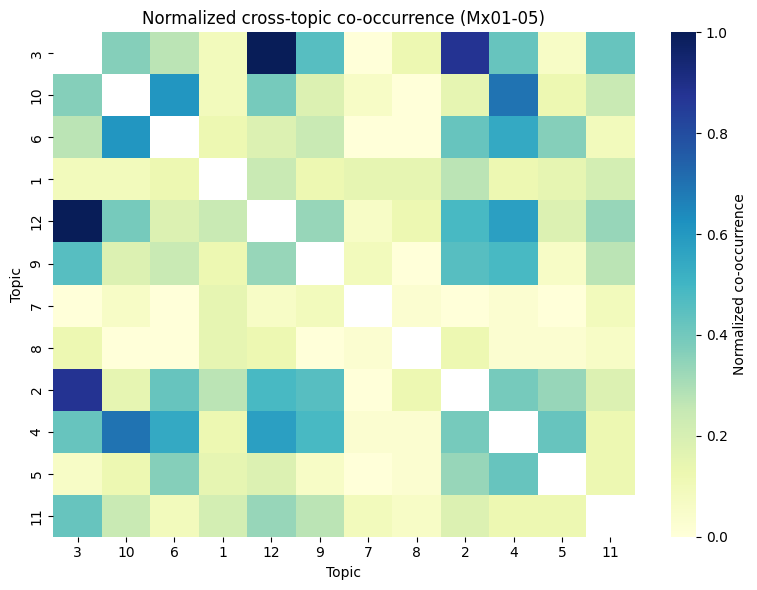

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 读取一个示例文件（替换为实际路径）
df = pd.read_csv("Result/author_id/Mx01-05.csv", index_col=0)

# 去掉 Total 行列
df_clean = df.drop(index="Total", errors="ignore").drop(columns=["Total"], errors="ignore")

# 找到最大跨-topic值
mask_offdiag = ~np.eye(df_clean.shape[0], dtype=bool)
max_offdiag = df_clean.where(mask_offdiag).max().max()

# 标准化
df_norm = df_clean / max_offdiag
np.fill_diagonal(df_norm.values, np.nan)  # 对角线设为 NaN

# 热力图
plt.figure(figsize=(8,6))
sns.heatmap(df_norm, cmap="YlGnBu", annot=False, vmin=0, vmax=1, cbar_kws={'label': 'Normalized co-occurrence'})
plt.title("Normalized cross-topic co-occurrence (Mx01-05)")
plt.xlabel("Topic")
plt.ylabel("Topic")
plt.tight_layout()
plt.show()


图表已保存为: heatmap_Mx01-05.pdf
同时保存为PNG格式: heatmap_Mx01-05.png


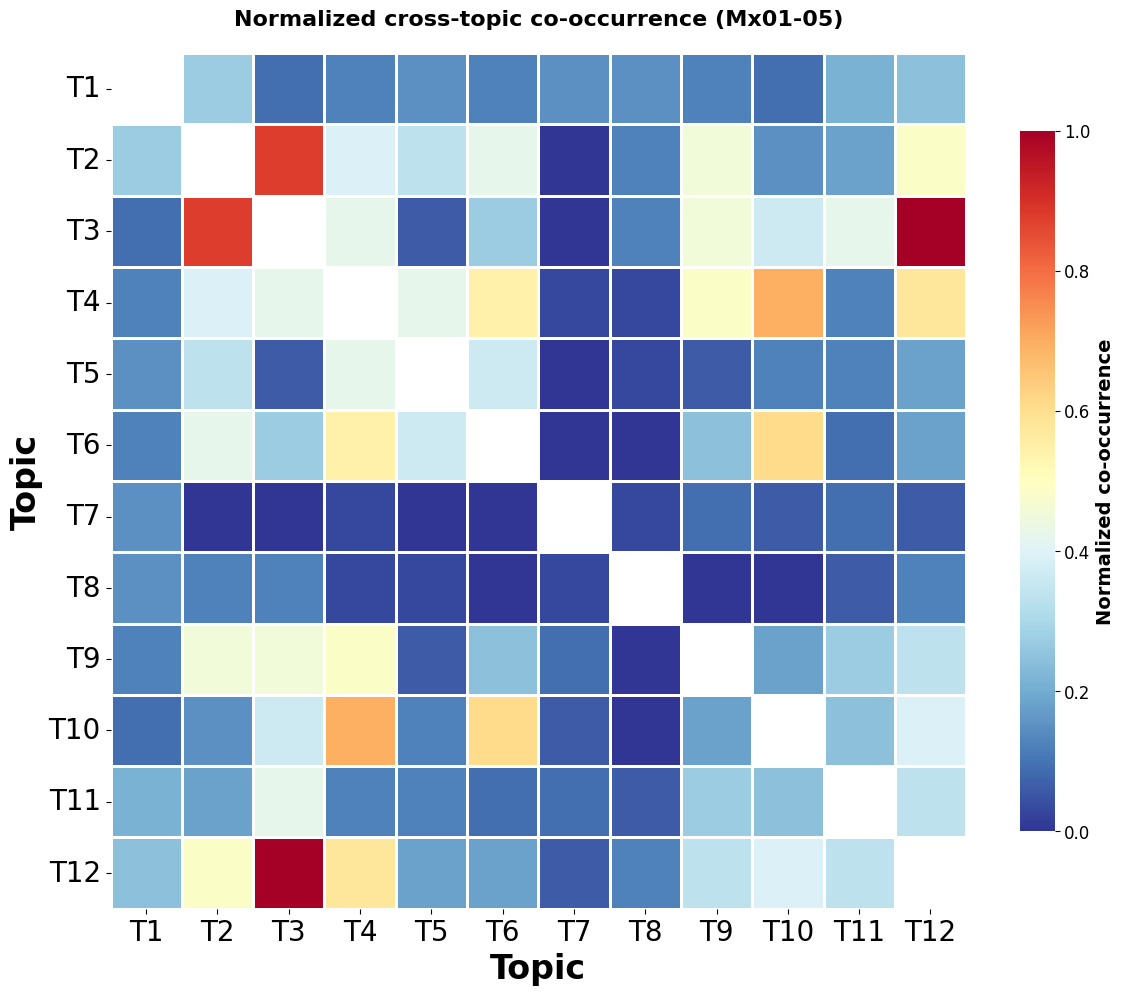

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42  # 确保字体可编辑

# 读取一个示例文件（替换为实际路径）
df = pd.read_csv("Result/author_id/Mx01-05.csv", index_col=0)

# 去掉 Total 行列
df_clean = df.drop(index="Total", errors="ignore").drop(columns=["Total"], errors="ignore")

# 按数字大小对行和列进行排序
def sort_key(x):
    try:
        return int(str(x))
    except:
        return float('inf')

# 对索引和列进行数字排序
sorted_index = sorted(df_clean.index, key=sort_key)
sorted_columns = sorted(df_clean.columns, key=sort_key)
df_clean = df_clean.loc[sorted_index, sorted_columns]

# 找到最大跨-topic值
mask_offdiag = ~np.eye(df_clean.shape[0], dtype=bool)
max_offdiag = df_clean.where(mask_offdiag).max().max()

# 标准化
df_norm = df_clean / max_offdiag
np.fill_diagonal(df_norm.values, np.nan)  # 对角线设为 NaN

# 创建带T前缀的标签
topic_labels = [f'T{x}' for x in df_norm.index]

# 创建图形，调整大小以便文字清晰显示
plt.figure(figsize=(12, 10))

# 使用红蓝色调的colormap
# 可选择的红蓝色调：'RdBu_r', 'RdYlBu_r', 'coolwarm', 'bwr', 'seismic'
sns.heatmap(df_norm,
            cmap="RdYlBu_r",  # 红-黄-蓝反转色调，从红到蓝
            annot=False,
            vmin=0,
            vmax=1,
            cbar_kws={'label': 'Normalized co-occurrence', 'shrink': 0.8},
            square=True,  # 使热力图单元格为正方形
            linewidths=0.8,  # 添加网格线
            xticklabels=topic_labels,  # 使用T前缀标签
            yticklabels=topic_labels)  # 使用T前缀标签

plt.title("Normalized cross-topic co-occurrence (Mx01-05)", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Topic", fontsize=24, fontweight='bold')
plt.ylabel("Topic", fontsize=24, fontweight='bold')

# 设置坐标轴标签的字体大小
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)

# 设置colorbar的字体大小
cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Normalized co-occurrence', fontsize=14, fontweight='bold')

plt.tight_layout()

# 保存为可编辑的PDF，使用更高的DPI确保缩小后文字清晰
output_filename = "heatmap_Mx01-05.pdf"
plt.savefig(output_filename, format='pdf', dpi=400, bbox_inches='tight',
            facecolor='white', edgecolor='none')
print(f"图表已保存为: {output_filename}")

# 也可以同时保存为高分辨率PNG格式
plt.savefig("heatmap_Mx01-05.png", format='png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')
print("同时保存为PNG格式: heatmap_Mx01-05.png")

# 显示图表
plt.show()

# 如果需要保存多个图表到一个PDF文件，可以使用以下方式：

with PdfPages('multiple_heatmaps.pdf') as pdf:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_norm, cmap="RdYlBu_r", annot=False, vmin=0, vmax=1,
                cbar_kws={'label': 'Normalized co-occurrence'})
    plt.title("Normalized cross-topic co-occurrence (Mx01-05)")
    pdf.savefig(bbox_inches='tight')
    plt.close()


图表已保存为: heatmap_Mx01-05.pdf
同时保存为PNG格式: heatmap_Mx01-05.png


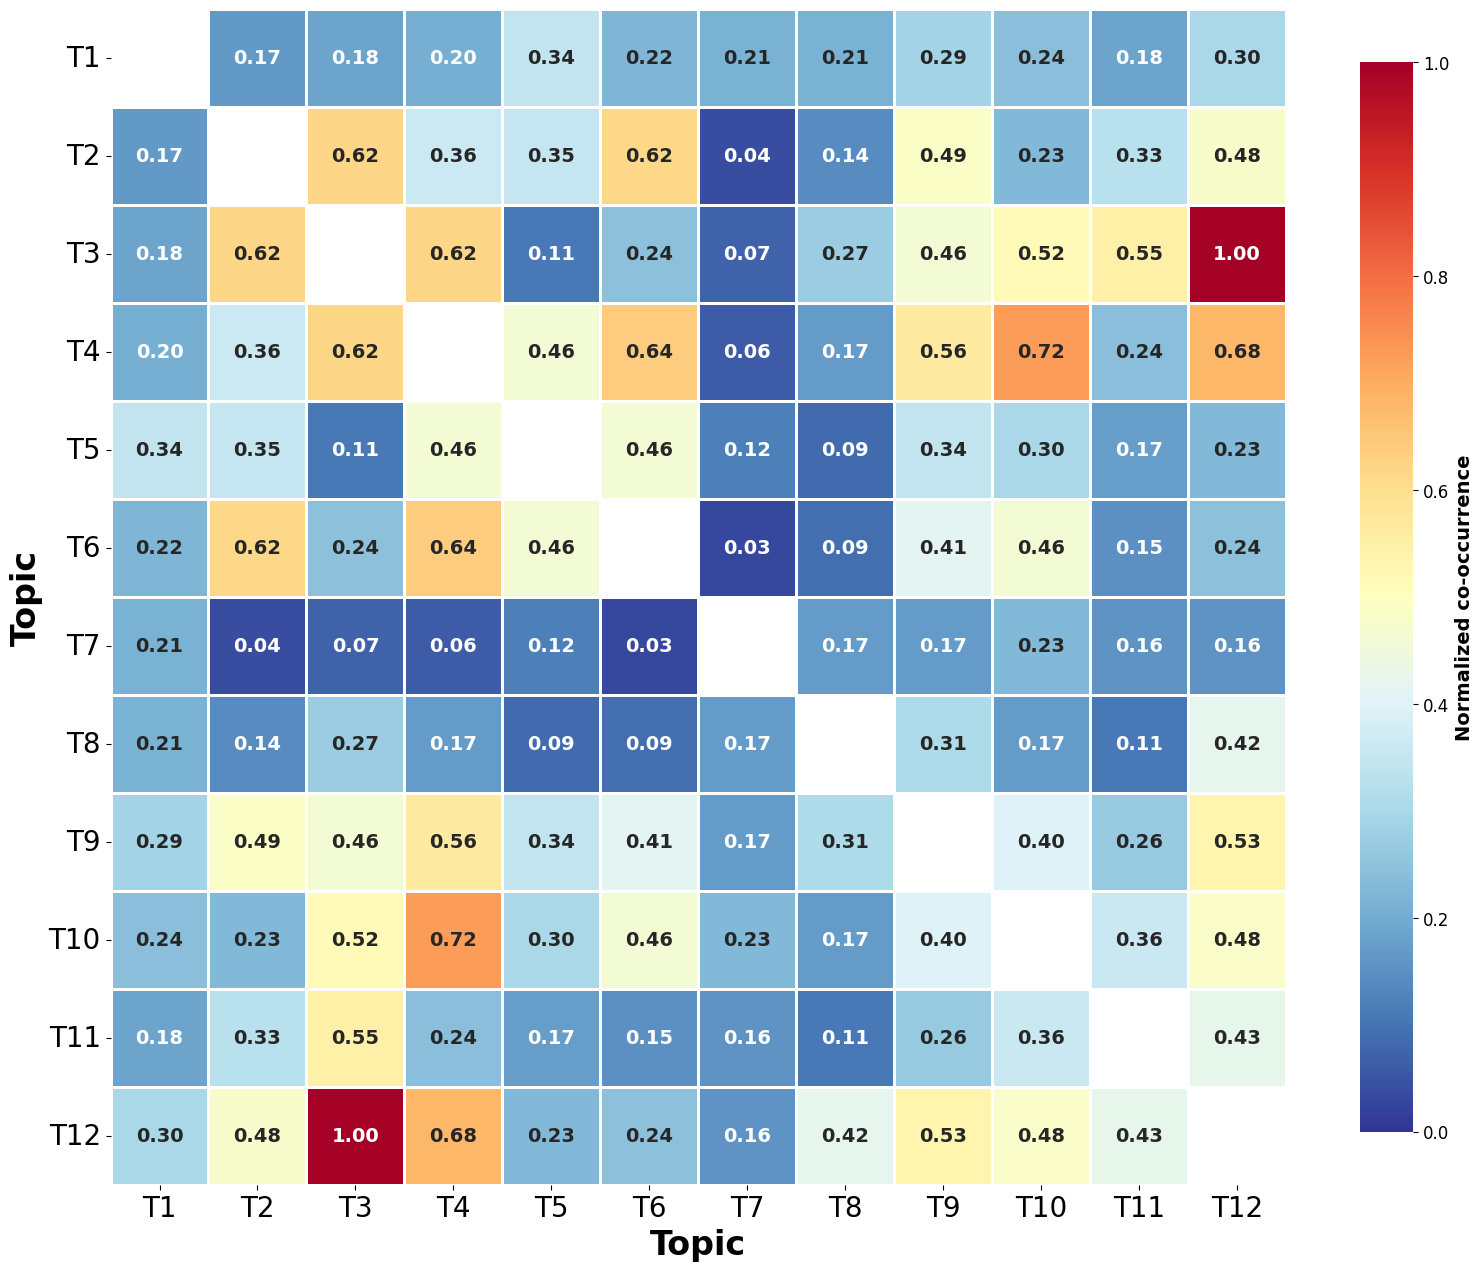

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42  # 确保字体可编辑

# 读取一个示例文件（替换为实际路径）
df = pd.read_csv("Result/author_id/Mx91|1.csv", index_col=0)

# 去掉 Total 行列
df_clean = df.drop(index="Total", errors="ignore").drop(columns=["Total"], errors="ignore")

# 按数字大小对行和列进行排序
def sort_key(x):
    try:
        return int(str(x))
    except:
        return float('inf')

# 对索引和列进行数字排序
sorted_index = sorted(df_clean.index, key=sort_key)
sorted_columns = sorted(df_clean.columns, key=sort_key)
df_clean = df_clean.loc[sorted_index, sorted_columns]

# 找到最大跨-topic值
mask_offdiag = ~np.eye(df_clean.shape[0], dtype=bool)
max_offdiag = df_clean.where(mask_offdiag).max().max()

# 标准化
df_norm = df_clean / max_offdiag
np.fill_diagonal(df_norm.values, np.nan)  # 对角线设为 NaN

# 创建带T前缀的标签
topic_labels = [f'T{x}' for x in df_norm.index]

# 创建图形，调整大小以便文字清晰显示
plt.figure(figsize=(16, 14))

# 使用红蓝色调的colormap，并启用数字标注
sns.heatmap(df_norm,
            cmap="RdYlBu_r",  # 红-黄-蓝反转色调，从红到蓝
            annot=True,  # 显示数字
            fmt='.2f',  # 格式化数字为两位小数
            annot_kws={'size': 14, 'weight': 'bold'},  # 增加数字的字体大小和粗细
            vmin=0,
            vmax=1,
            cbar_kws={'label': 'Normalized co-occurrence', 'shrink': 0.8},
            square=True,  # 使热力图单元格为正方形
            linewidths=0.8,  # 添加网格线
            xticklabels=topic_labels,  # 使用T前缀标签
            yticklabels=topic_labels)  # 使用T前缀标签

#plt.title("Normalized cross-topic co-occurrence (Mx01-05)", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Topic", fontsize=24, fontweight='bold')
plt.ylabel("Topic", fontsize=24, fontweight='bold')

# 设置坐标轴标签的字体大小
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)

# 设置colorbar的字体大小
cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Normalized co-occurrence', fontsize=14, fontweight='bold')

plt.tight_layout()

# 保存为可编辑的PDF，使用更高的DPI确保缩小后文字清晰
output_filename = "heatmap_Mx01-05.pdf"
plt.savefig(output_filename, format='pdf', dpi=400, bbox_inches='tight',
            facecolor='white', edgecolor='none')
print(f"图表已保存为: {output_filename}")

# 也可以同时保存为高分辨率PNG格式
plt.savefig("heatmap_Mx01-05.png", format='png', dpi=300, bbox_inches='tight',
            facecolor='white', edgecolor='none')
print("同时保存为PNG格式: heatmap_Mx01-05.png")

# 显示图表
plt.show()

# 如果需要保存多个图表到一个PDF文件，可以使用以下方式：
with PdfPages('multiple_heatmaps.pdf') as pdf:
    plt.figure(figsize=(16, 14))
    sns.heatmap(df_norm, cmap="RdYlBu_r", annot=True, fmt='.2f',
                annot_kws={'size': 14, 'weight': 'bold'}, vmin=0, vmax=1,
                cbar_kws={'label': 'Normalized co-occurrence'},
                xticklabels=topic_labels,
                yticklabels=topic_labels,
                square=True,
                linewidths=0.8)
    plt.title("Normalized cross-topic co-occurrence (Mx01-05)")
    pdf.savefig(bbox_inches='tight')
    plt.close()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib
import glob
import os
matplotlib.rcParams['pdf.fonttype'] = 42  # 确保字体可编辑

def process_heatmap(df, filename):
    """处理单个数据文件并生成热力图"""
    # 去掉 Total 行列
    df_clean = df.drop(index="Total", errors="ignore").drop(columns=["Total"], errors="ignore")

    # 按数字大小对行和列进行排序
    def sort_key(x):
        try:
            return int(str(x))
        except:
            return float('inf')

    # 对索引和列进行数字排序
    sorted_index = sorted(df_clean.index, key=sort_key)
    sorted_columns = sorted(df_clean.columns, key=sort_key)
    df_clean = df_clean.loc[sorted_index, sorted_columns]

    # 找到最大跨-topic值
    mask_offdiag = ~np.eye(df_clean.shape[0], dtype=bool)
    max_offdiag = df_clean.where(mask_offdiag).max().max()

    # 标准化
    df_norm = df_clean / max_offdiag
    np.fill_diagonal(df_norm.values, np.nan)  # 对角线设为 NaN

    # 创建带T前缀的标签
    topic_labels = [f'T{x}' for x in df_norm.index]

    # 创建图形，调整大小以便文字清晰显示
    plt.figure(figsize=(12, 10))

    # 使用红蓝色调的colormap
    sns.heatmap(df_norm,
                cmap="RdYlBu_r",  # 红-黄-蓝反转色调，从红到蓝
                annot=False,
                vmin=0,
                vmax=1,
                cbar_kws={'label': 'Normalized co-occurrence', 'shrink': 0.8},
                square=True,  # 使热力图单元格为正方形
                linewidths=0.8,  # 添加网格线
                xticklabels=topic_labels,  # 使用T前缀标签
                yticklabels=topic_labels)  # 使用T前缀标签

    # 从文件名中提取标识符用于标题
    file_id = os.path.basename(filename).replace('.csv', '')
    plt.title(f"Normalized cross-topic co-occurrence ({file_id})",
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel("Topic", fontsize=24, fontweight='bold')
    plt.ylabel("Topic", fontsize=24, fontweight='bold')

    # 设置坐标轴标签的字体大小
    plt.xticks(fontsize=20, rotation=0)
    plt.yticks(fontsize=20, rotation=0)

    # 设置colorbar的字体大小
    cbar = plt.gca().collections[0].colorbar
    cbar.ax.tick_params(labelsize=10)
    cbar.set_label('Normalized co-occurrence', fontsize=12, fontweight='bold')

    plt.tight_layout()

    return plt.gcf()

# 设置文件路径
folder_path = "Result/author_id/"
output_pdf = "Result/author_id/all_heatmaps_Mx.pdf"

# 查找所有Mx开头的CSV文件
csv_files = glob.glob(os.path.join(folder_path, "Mx*.csv"))
csv_files.sort()  # 按文件名排序

print(f"找到 {len(csv_files)} 个Mx开头的CSV文件:")
for file in csv_files:
    print(f"  - {os.path.basename(file)}")

# 批量处理并保存到同一个PDF
with PdfPages(output_pdf) as pdf:
    for csv_file in csv_files:
        try:
            print(f"正在处理: {os.path.basename(csv_file)}")

            # 读取CSV文件
            df = pd.read_csv(csv_file, index_col=0)

            # 生成热力图
            fig = process_heatmap(df, csv_file)

            # 保存到PDF
            pdf.savefig(fig, bbox_inches='tight', dpi=300)

            # 关闭当前图形以释放内存
            plt.close(fig)

        except Exception as e:
            print(f"处理文件 {csv_file} 时出错: {str(e)}")
            continue

print(f"\n所有热力图已保存到: {output_pdf}")

# 可选：也为每个文件单独保存PNG格式
save_individual_png = False  # 设置为True如果需要单独保存PNG

if save_individual_png:
    print("\n正在保存单独的PNG文件...")
    for csv_file in csv_files:
        try:
            df = pd.read_csv(csv_file, index_col=0)
            fig = process_heatmap(df, csv_file)

            # 生成PNG文件名
            png_filename = os.path.basename(csv_file).replace('.csv', '_heatmap.png')
            plt.savefig(png_filename, format='png', dpi=300, bbox_inches='tight',
                       facecolor='white', edgecolor='none')
            print(f"  保存: {png_filename}")

            plt.close(fig)

        except Exception as e:
            print(f"保存PNG文件时出错 {csv_file}: {str(e)}")
            continue

print("\n批量处理完成！")

找到 7 个Mx开头的CSV文件:
  - Mx01-05.csv
  - Mx06-10.csv
  - Mx11-15.csv
  - Mx16-18.csv
  - Mx19-21.csv
  - Mx91-00.csv
  - Mx91|21.csv
正在处理: Mx01-05.csv
正在处理: Mx06-10.csv
正在处理: Mx11-15.csv
正在处理: Mx16-18.csv
正在处理: Mx19-21.csv
正在处理: Mx91-00.csv
正在处理: Mx91|21.csv

所有热力图已保存到: Result/author_id/all_heatmaps_Mx.pdf

批量处理完成！


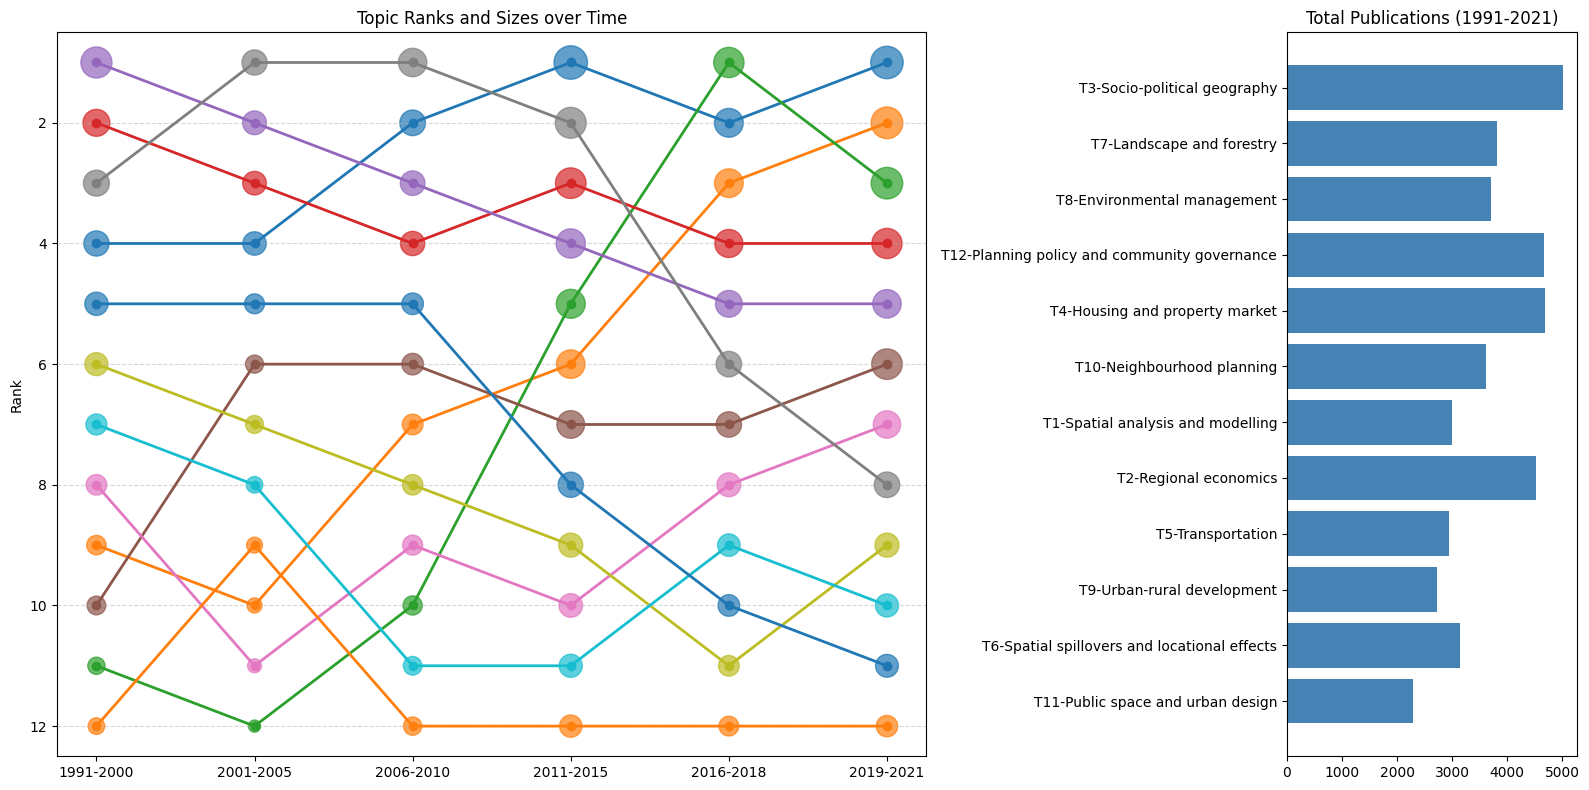

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# -----------------------
# Input Data
# -----------------------
rank_data = {
    "T3-Socio-political geography": [4, 4, 2, 1, 2, 1],
    "T7-Landscape and forestry": [9, 10, 7, 6, 3, 2],
    "T8-Environmental management": [11, 12, 10, 5, 1, 3],
    "T12-Planning policy and community governance": [2, 3, 4, 3, 4, 4],
    "T4-Housing and property market": [1, 2, 3, 4, 5, 5],
    "T10-Neighbourhood planning": [10, 6, 6, 7, 7, 6],
    "T1-Spatial analysis and modelling": [8, 11, 9, 10, 8, 7],
    "T2-Regional economics": [3, 1, 1, 2, 6, 8],
    "T5-Transportation": [6, 7, 8, 9, 11, 9],
    "T9-Urban-rural development": [7, 8, 11, 11, 9, 10],
    "T6-Spatial spillovers and locational effects": [5, 5, 5, 8, 10, 11],
    "T11-Public space and urban design": [12, 9, 12, 12, 12, 12],
}

size_data = {
    "T4-Housing and property market": [1002, 584, 626, 886, 746, 841],
    "T12-Planning policy and community governance": [752, 578, 610, 970, 816, 945],
    "T2-Regional economics": [698, 655, 834, 990, 676, 676],
    "T3-Socio-political geography": [657, 570, 680, 1158, 860, 1092],
    "T6-Spatial spillovers and locational effects": [561, 412, 485, 660, 486, 540],
    "T5-Transportation": [548, 335, 432, 597, 444, 597],
    "T9-Urban-rural development": [457, 283, 360, 555, 524, 551],
    "T1-Spatial analysis and modelling": [439, 202, 416, 580, 588, 777],
    "T7-Landscape and forestry": [394, 236, 445, 844, 852, 1040],
    "T10-Neighbourhood planning": [364, 340, 482, 794, 670, 967],
    "T8-Environmental management": [308, 154, 384, 871, 949, 1035],
    "T11-Public space and urban design": [286, 262, 347, 514, 403, 475],
}

periods = ["1991-2000", "2001-2005", "2006-2010", "2011-2015", "2016-2018", "2019-2021"]

# Convert to DataFrame
rank_df = pd.DataFrame(rank_data, index=periods)
size_df = pd.DataFrame(size_data, index=periods)

# Final period ranking order
final_rank = rank_df.loc["2019-2021"].sort_values().to_dict()
sorted_topics = list(final_rank.keys())

# -----------------------
# Plot
# -----------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [3, 1]})

# Left side: rank trajectories with bubble size
for topic in sorted_topics:
    ranks = rank_df[topic].values
    sizes = size_df[topic].values
    ax1.plot(periods, ranks, marker="o", lw=2, label=topic)
    ax1.scatter(periods, ranks, s=np.array(sizes)/2, alpha=0.7)

ax1.set_ylim(12.5, 0.5)
ax1.set_ylabel("Rank")
ax1.set_title("Topic Ranks and Sizes over Time")
ax1.grid(True, axis='y', linestyle="--", alpha=0.5)

# Right side: bar chart of total size
total_size = size_df.sum(axis=0).reindex(sorted_topics)
ax2.barh(total_size.index, total_size.values, color="steelblue")
ax2.set_title("Total Publications (1991-2021)")
ax2.invert_yaxis()

# Add rank labels
# for i, topic in enumerate(total_size.index):
#     ax2.text(total_size[topic]+50, i, f"Rank {i+1}", va="center")

plt.tight_layout()
plt.show()


/tmp/ipython-input-641438297.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20", len(sorted_topics))  # qualitative colormap with enough distinct colors


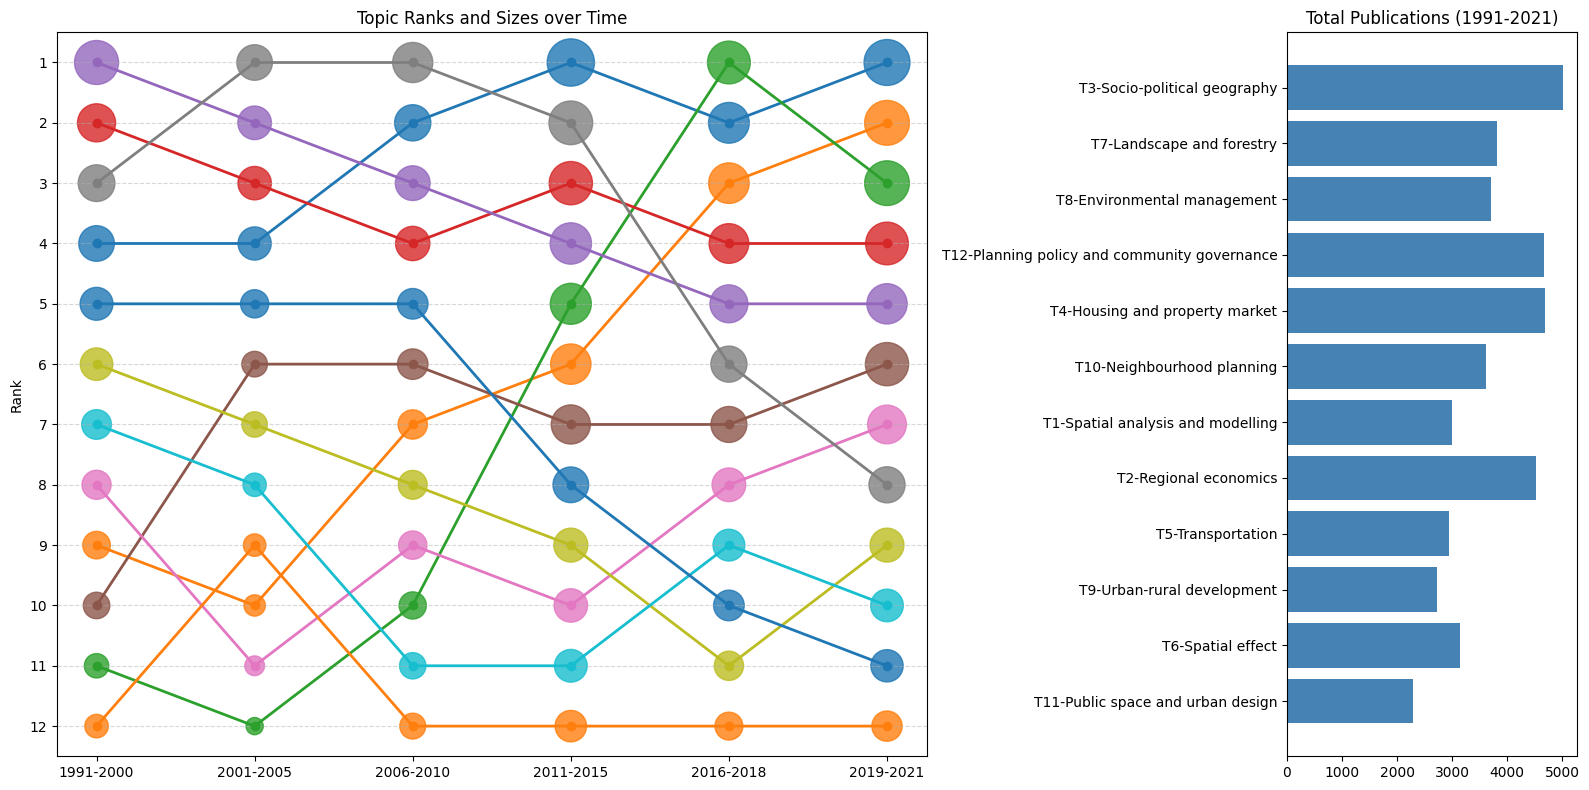

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# -----------------------
# Input Data
# -----------------------
rank_data = {
    "T3-Socio-political geography": [4, 4, 2, 1, 2, 1],
    "T7-Landscape and forestry": [9, 10, 7, 6, 3, 2],
    "T8-Environmental management": [11, 12, 10, 5, 1, 3],
    "T12-Planning policy and community governance": [2, 3, 4, 3, 4, 4],
    "T4-Housing and property market": [1, 2, 3, 4, 5, 5],
    "T10-Neighbourhood planning": [10, 6, 6, 7, 7, 6],
    "T1-Spatial analysis and modelling": [8, 11, 9, 10, 8, 7],
    "T2-Regional economics": [3, 1, 1, 2, 6, 8],
    "T5-Transportation": [6, 7, 8, 9, 11, 9],
    "T9-Urban-rural development": [7, 8, 11, 11, 9, 10],
    "T6-Spatial effect": [5, 5, 5, 8, 10, 11],
    "T11-Public space and urban design": [12, 9, 12, 12, 12, 12],
}

size_data = {
    "T4-Housing and property market": [1002, 584, 626, 886, 746, 841],
    "T12-Planning policy and community governance": [752, 578, 610, 970, 816, 945],
    "T2-Regional economics": [698, 655, 834, 990, 676, 676],
    "T3-Socio-political geography": [657, 570, 680, 1158, 860, 1092],
    "T6-Spatial effect": [561, 412, 485, 660, 486, 540],
    "T5-Transportation": [548, 335, 432, 597, 444, 597],
    "T9-Urban-rural development": [457, 283, 360, 555, 524, 551],
    "T1-Spatial analysis and modelling": [439, 202, 416, 580, 588, 777],
    "T7-Landscape and forestry": [394, 236, 445, 844, 852, 1040],
    "T10-Neighbourhood planning": [364, 340, 482, 794, 670, 967],
    "T8-Environmental management": [308, 154, 384, 871, 949, 1035],
    "T11-Public space and urban design": [286, 262, 347, 514, 403, 475],
}

periods = ["1991-2000", "2001-2005", "2006-2010", "2011-2015", "2016-2018", "2019-2021"]

# Convert to DataFrame
rank_df = pd.DataFrame(rank_data, index=periods)
size_df = pd.DataFrame(size_data, index=periods)

# Final period ranking order
final_rank = rank_df.loc["2019-2021"].sort_values().to_dict()
sorted_topics = list(final_rank.keys())


# -----------------------
# Assign Unique Colors
# -----------------------
cmap = cm.get_cmap("tab20", len(sorted_topics))  # qualitative colormap with enough distinct colors
topic_colors = {topic: cmap(i) for i, topic in enumerate(sorted_topics)}

# -----------------------
# Plot
# -----------------------

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [3, 1]})

# Left side: rank trajectories with bubble size
for topic in sorted_topics:
    ranks = rank_df[topic].values
    sizes = size_df[topic].values
    ax1.plot(periods, ranks, marker="o", lw=2, label=topic)
    ax1.scatter(periods, ranks, s=np.array(sizes), alpha=0.8)

ax1.set_ylim(12.5, 0.5)
ax1.set_yticks(range(1, 13, 1))   # y-axis from 1 to 12
ax1.set_ylabel("Rank")
ax1.set_title("Topic Ranks and Sizes over Time")
ax1.grid(True, axis='y', linestyle="--", alpha=0.5)

# Right side: bar chart of total size
total_size = size_df.sum(axis=0).reindex(sorted_topics)
ax2.barh(total_size.index, total_size.values, color="steelblue")
ax2.set_title("Total Publications (1991-2021)")
ax2.invert_yaxis()

# Add rank labels
# for i, topic in enumerate(total_size.index):
#     ax2.text(total_size[topic]+50, i, f"Rank {i+1}", va="center")

plt.tight_layout()

# -----------------------
# Save as editable PDF
# -----------------------
plt.savefig("topic_trends.pdf", format="pdf")
plt.show()


/tmp/ipython-input-1773970790.py:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20", len(sorted_topics))  # qualitative colormap


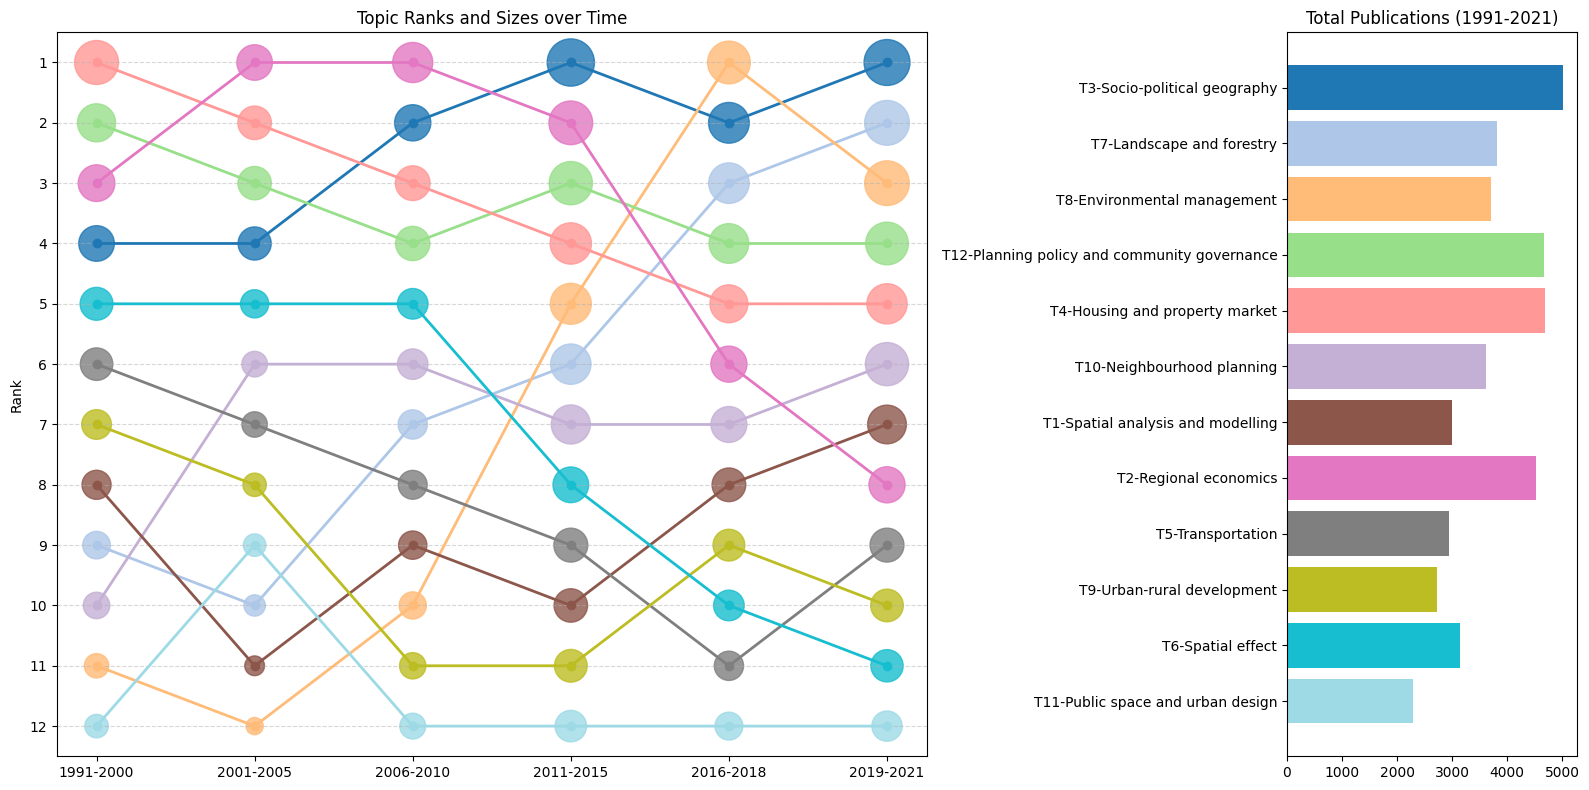

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# -----------------------
# Input Data
# -----------------------
rank_data = {
    "T3-Socio-political geography": [4, 4, 2, 1, 2, 1],
    "T7-Landscape and forestry": [9, 10, 7, 6, 3, 2],
    "T8-Environmental management": [11, 12, 10, 5, 1, 3],
    "T12-Planning policy and community governance": [2, 3, 4, 3, 4, 4],
    "T4-Housing and property market": [1, 2, 3, 4, 5, 5],
    "T10-Neighbourhood planning": [10, 6, 6, 7, 7, 6],
    "T1-Spatial analysis and modelling": [8, 11, 9, 10, 8, 7],
    "T2-Regional economics": [3, 1, 1, 2, 6, 8],
    "T5-Transportation": [6, 7, 8, 9, 11, 9],
    "T9-Urban-rural development": [7, 8, 11, 11, 9, 10],
    "T6-Spatial effect": [5, 5, 5, 8, 10, 11],
    "T11-Public space and urban design": [12, 9, 12, 12, 12, 12],
}

size_data = {
    "T4-Housing and property market": [1002, 584, 626, 886, 746, 841],
    "T12-Planning policy and community governance": [752, 578, 610, 970, 816, 945],
    "T2-Regional economics": [698, 655, 834, 990, 676, 676],
    "T3-Socio-political geography": [657, 570, 680, 1158, 860, 1092],
    "T6-Spatial effect": [561, 412, 485, 660, 486, 540],
    "T5-Transportation": [548, 335, 432, 597, 444, 597],
    "T9-Urban-rural development": [457, 283, 360, 555, 524, 551],
    "T1-Spatial analysis and modelling": [439, 202, 416, 580, 588, 777],
    "T7-Landscape and forestry": [394, 236, 445, 844, 852, 1040],
    "T10-Neighbourhood planning": [364, 340, 482, 794, 670, 967],
    "T8-Environmental management": [308, 154, 384, 871, 949, 1035],
    "T11-Public space and urban design": [286, 262, 347, 514, 403, 475],
}

periods = ["1991-2000", "2001-2005", "2006-2010", "2011-2015", "2016-2018", "2019-2021"]

# Convert to DataFrame
rank_df = pd.DataFrame(rank_data, index=periods)
size_df = pd.DataFrame(size_data, index=periods)

# Final period ranking order
final_rank = rank_df.loc["2019-2021"].sort_values().to_dict()
sorted_topics = list(final_rank.keys())

# -----------------------
# Assign Unique Colors
# -----------------------
cmap = cm.get_cmap("tab20", len(sorted_topics))  # qualitative colormap
topic_colors = {topic: cmap(i) for i, topic in enumerate(sorted_topics)}

# -----------------------
# Plot
# -----------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [3, 1]})

# Left side: rank trajectories with bubble size
for topic in sorted_topics:
    ranks = rank_df[topic].values
    sizes = size_df[topic].values
    ax1.plot(periods, ranks, marker="o", lw=2, color=topic_colors[topic], label=topic)
    ax1.scatter(periods, ranks, s=np.array(sizes), alpha=0.8, color=topic_colors[topic])

ax1.set_ylim(12.5, 0.5)
ax1.set_yticks(range(1, 13, 1))   # y-axis from 1 to 12
ax1.set_ylabel("Rank")
ax1.set_title("Topic Ranks and Sizes over Time")
ax1.grid(True, axis='y', linestyle="--", alpha=0.5)

# Right side: bar chart of total size
total_size = size_df.sum(axis=0).reindex(sorted_topics)
colors = [topic_colors[t] for t in total_size.index]
ax2.barh(total_size.index, total_size.values, color=colors)
ax2.set_title("Total Publications (1991-2021)")
ax2.invert_yaxis()

plt.tight_layout()

# -----------------------
# Save as editable PDF
# -----------------------
plt.savefig("topic_trends.pdf", format="pdf")
plt.show()
